In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [104]:
import warnings
warnings.filterwarnings("ignore")

# Problem 1(Sparkling)

# 1- Read the data as an appropriate Time Series data and plot the data.

In [3]:
df = pd.read_csv('Sparkling.csv',parse_dates=True,index_col='YearMonth')
df.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [4]:
df.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [5]:
#Checking the shape of the data
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 187 rows and 1 columns


In [6]:
#Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [7]:
#describe the data
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

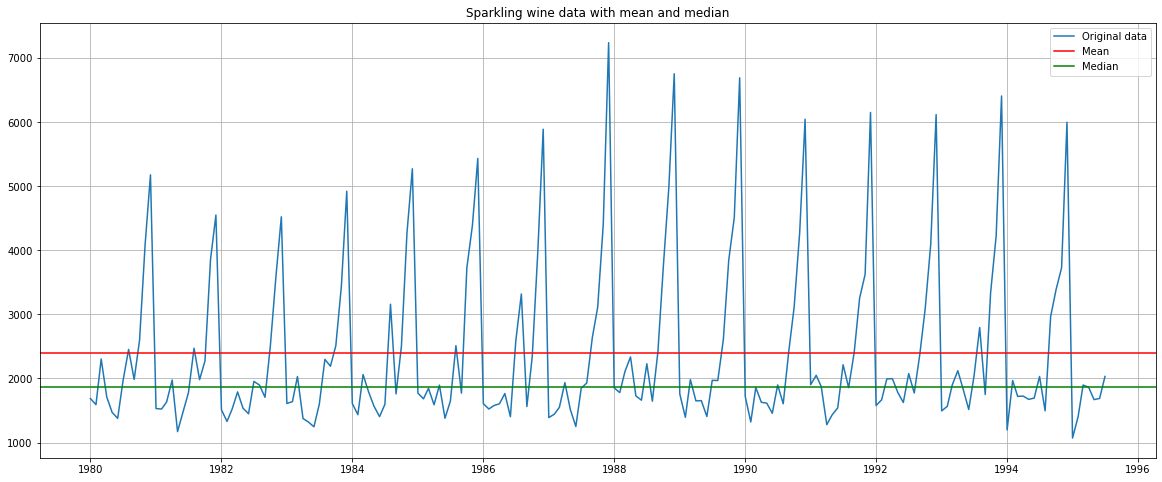

In [9]:
plt.plot(df['Sparkling']);
plt.axhline(df['Sparkling'].mean(),color='Red')
plt.axhline(df['Sparkling'].median(),color='Green')
plt.legend(['Original data','Mean','Median'],loc='best');
plt.grid();
plt.title('Sparkling wine data with mean and median');

In [10]:
#Checking the null values
df.isnull().sum()

Sparkling    0
dtype: int64

### Plot the time series

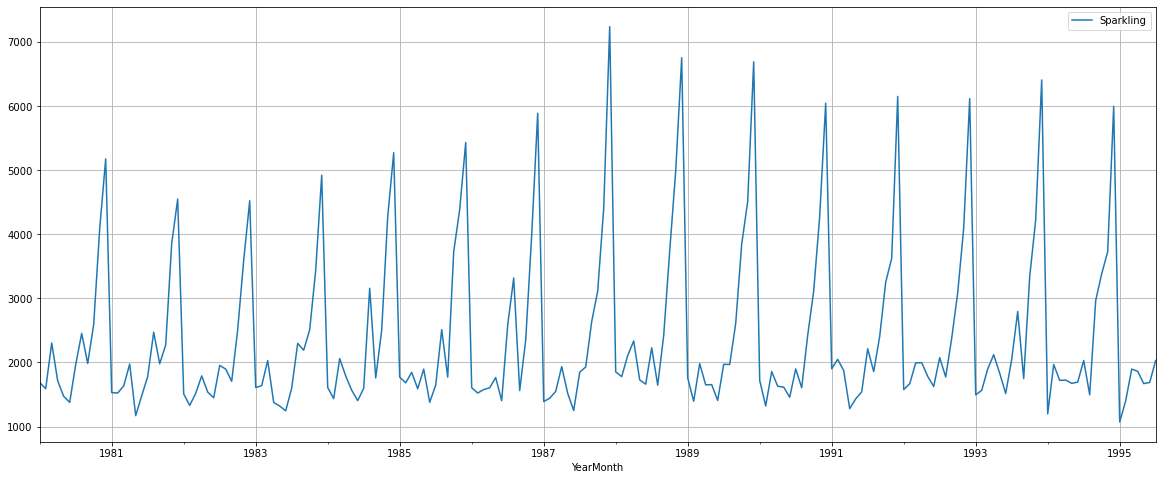

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
df.plot(grid=True);

# 2- Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

### Plot a year on year boxplot for the wine sales

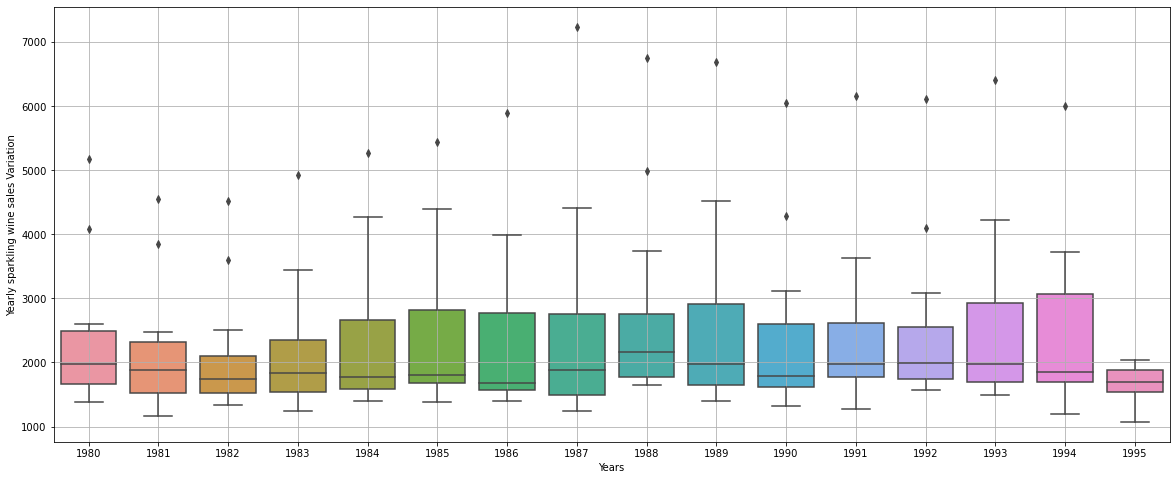

In [12]:
sns.boxplot(x=df.index.year, data=df,y=df['Sparkling'], whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly sparkling wine sales Variation');

### Plot a monthly boxplot for the wine sales taking all the years into account.

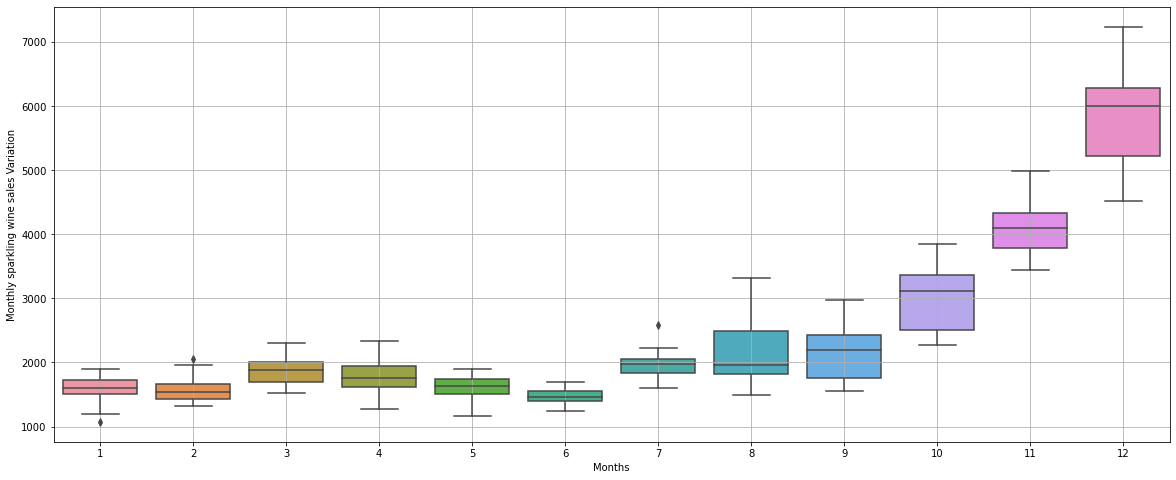

In [13]:
sns.boxplot(x=df.index.month, data=df, y=df['Sparkling'] ,whis=1.5)
plt.xlabel('Months');
plt.ylabel('Monthly sparkling wine sales Variation');
plt.grid();

### Plot a monthplot of the given Time Series.

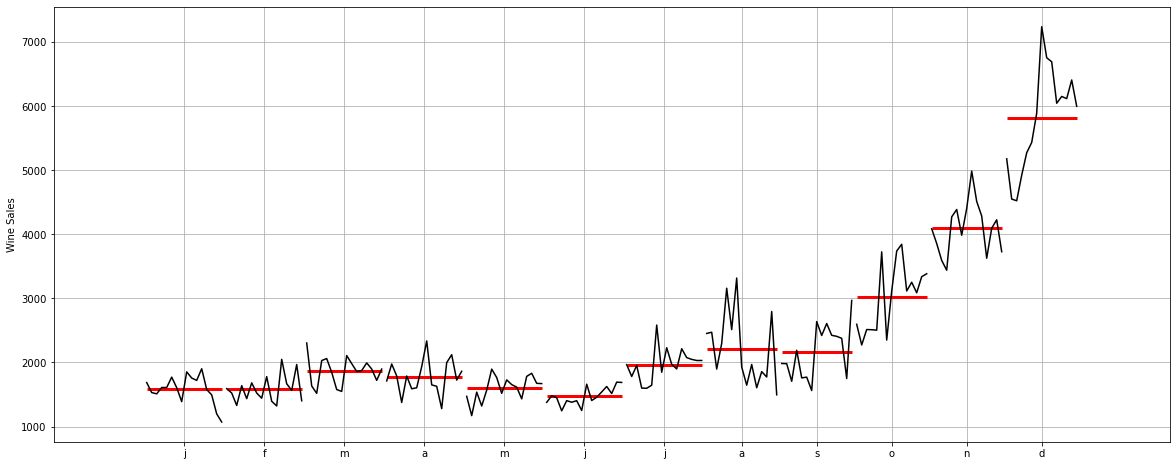

In [14]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df,ylabel='Wine Sales')
plt.grid();

### Monthly time series

In [15]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

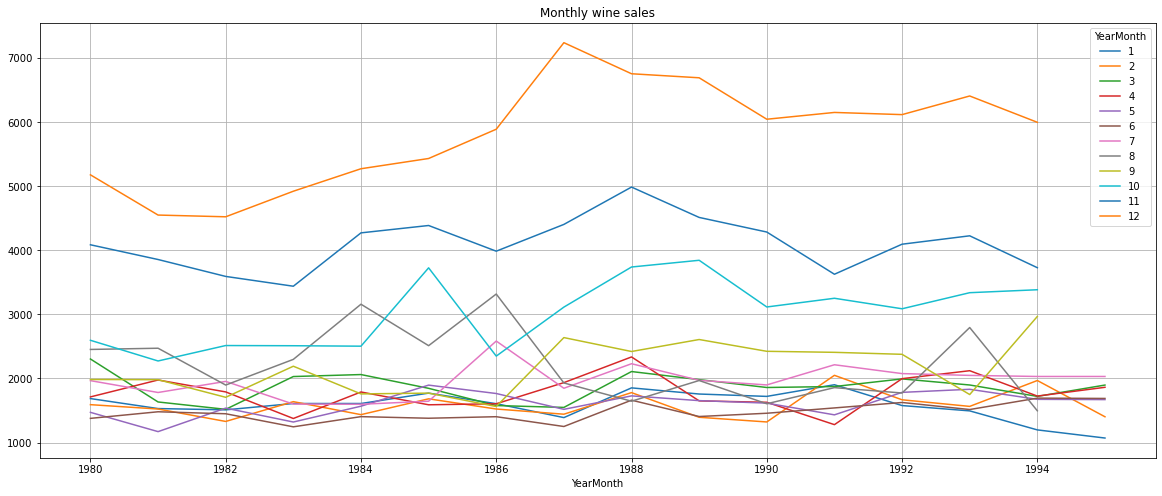

In [16]:
monthly_sales_across_years.plot(grid='True',title='Monthly wine sales');

### Yearly plot

In [17]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

Sparkling
YearMonth            
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

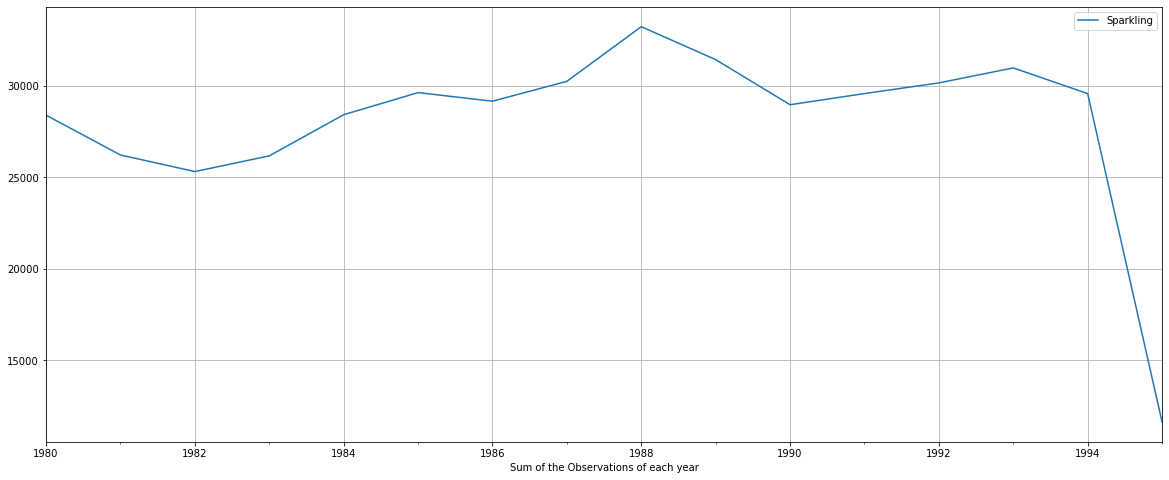

In [18]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [19]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean.head()

Sparkling
YearMonth              
1980-12-31  2367.166667
1981-12-31  2185.583333
1982-12-31  2110.083333
1983-12-31  2181.666667
1984-12-31  2369.250000

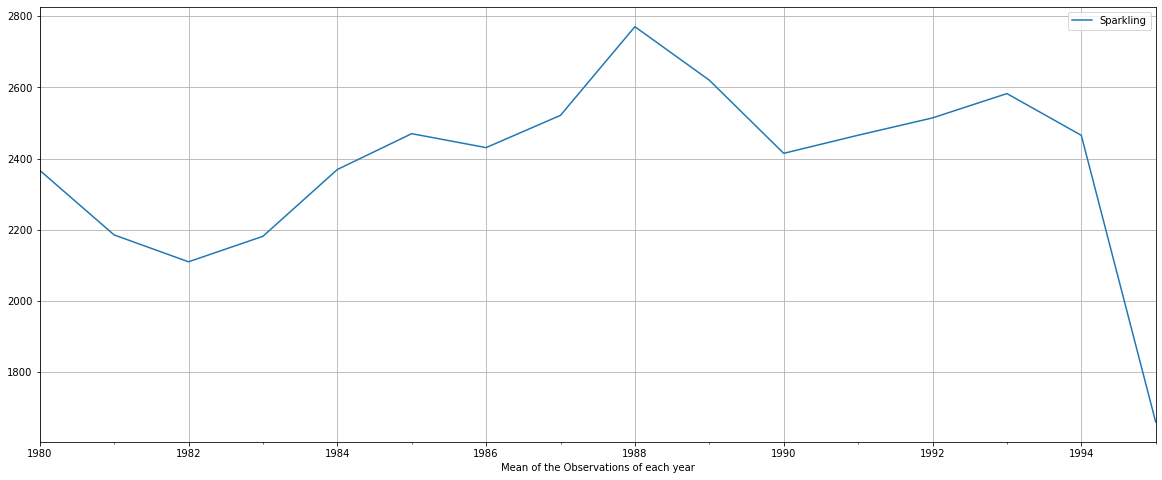

In [20]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

### Quarterly plot

In [21]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()

Sparkling
YearMonth            
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

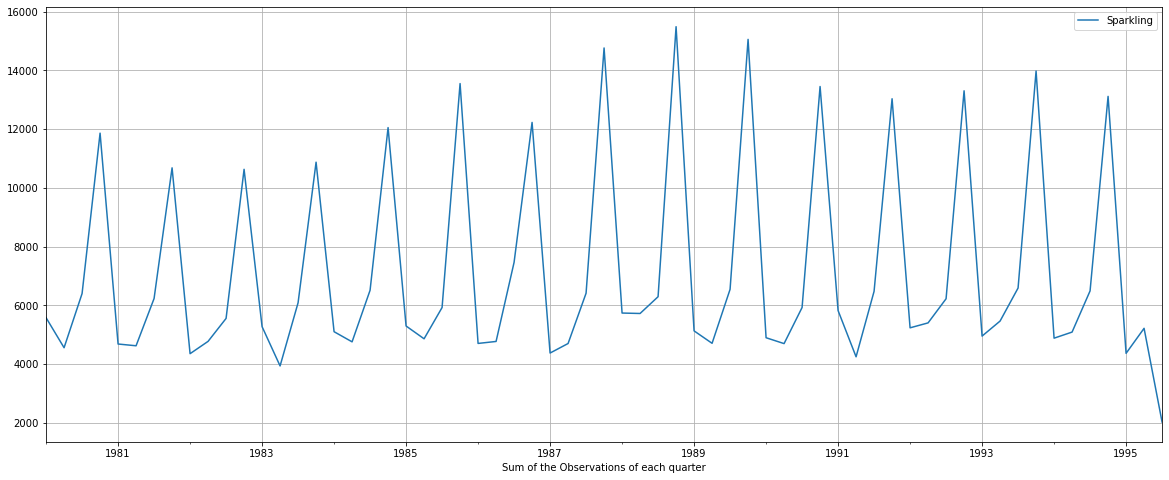

In [22]:
df_quarterly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each quarter');

In [23]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

Sparkling
YearMonth              
1980-03-31  1860.333333
1980-06-30  1520.000000
1980-09-30  2134.333333
1980-12-31  3954.000000
1981-03-31  1562.000000

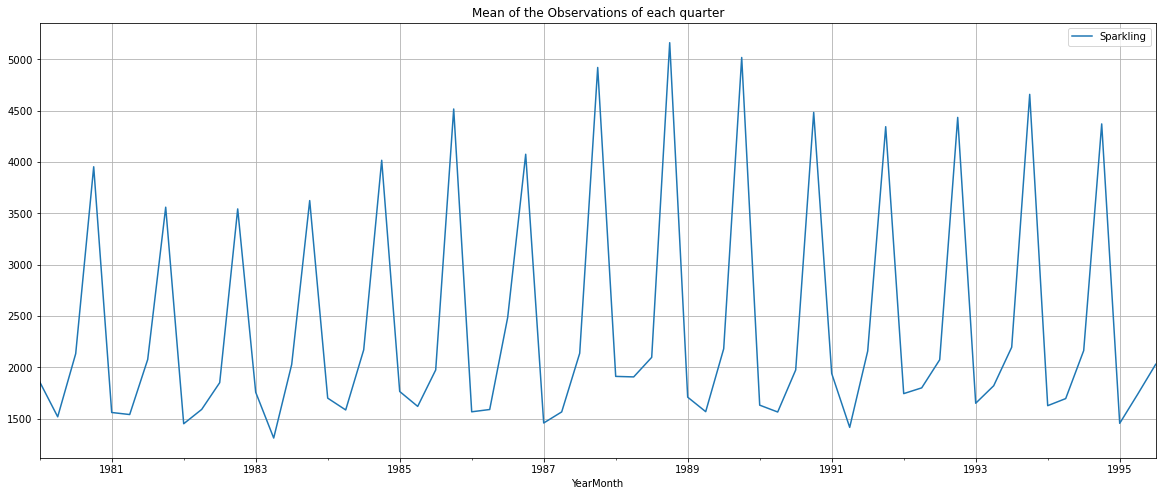

In [24]:
df_quarterly_mean.plot();
plt.grid()
plt.title('Mean of the Observations of each quarter');

### 5 yearly plot

In [25]:
df_decade_sum = df.resample('5Y').sum()
df_decade_sum

Sparkling
YearMonth            
1980-12-31      28406
1985-12-31     135799
1990-12-31     153094
1995-12-31     131953

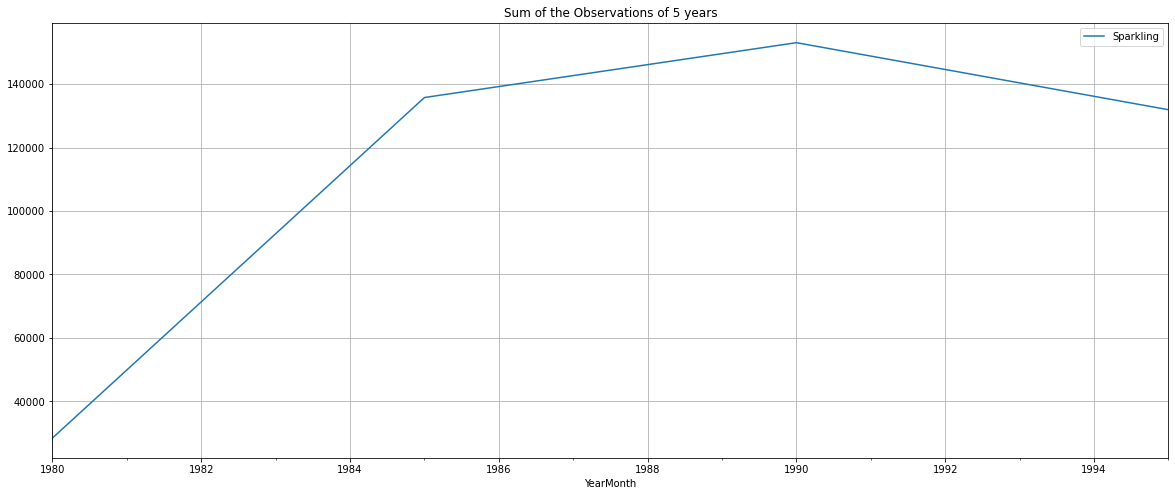

In [26]:
df_decade_sum.plot();
plt.grid()
plt.title('Sum of the Observations of 5 years');

### Decompose the series

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

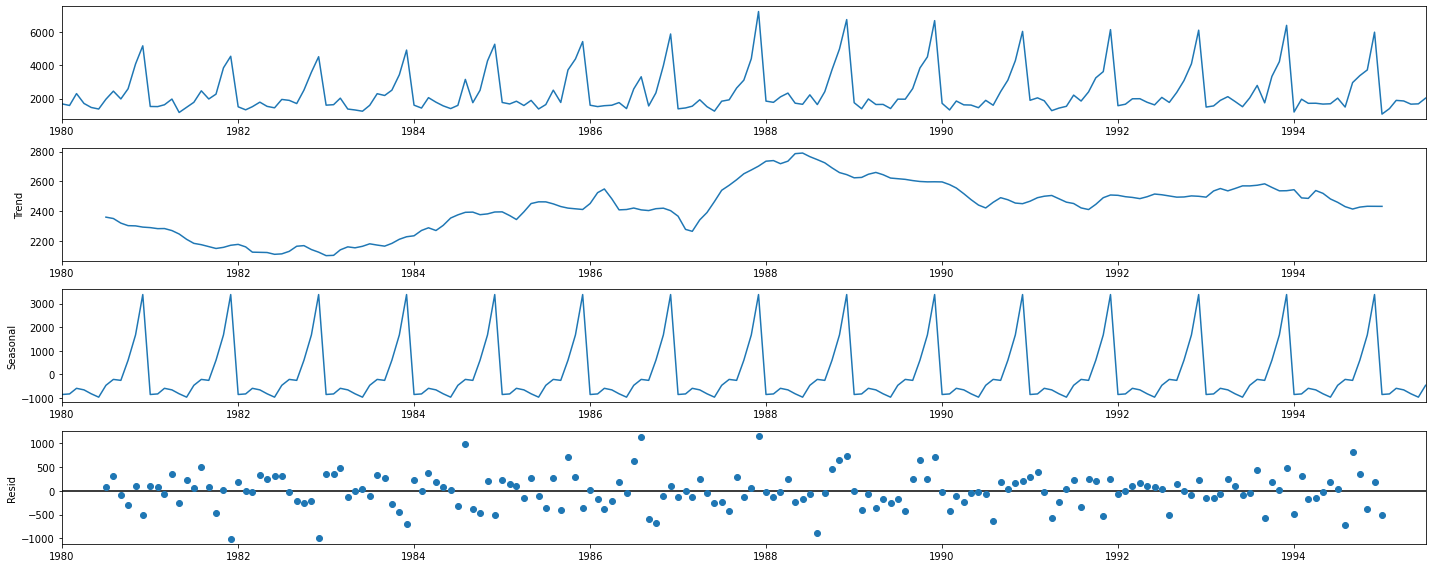

In [28]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

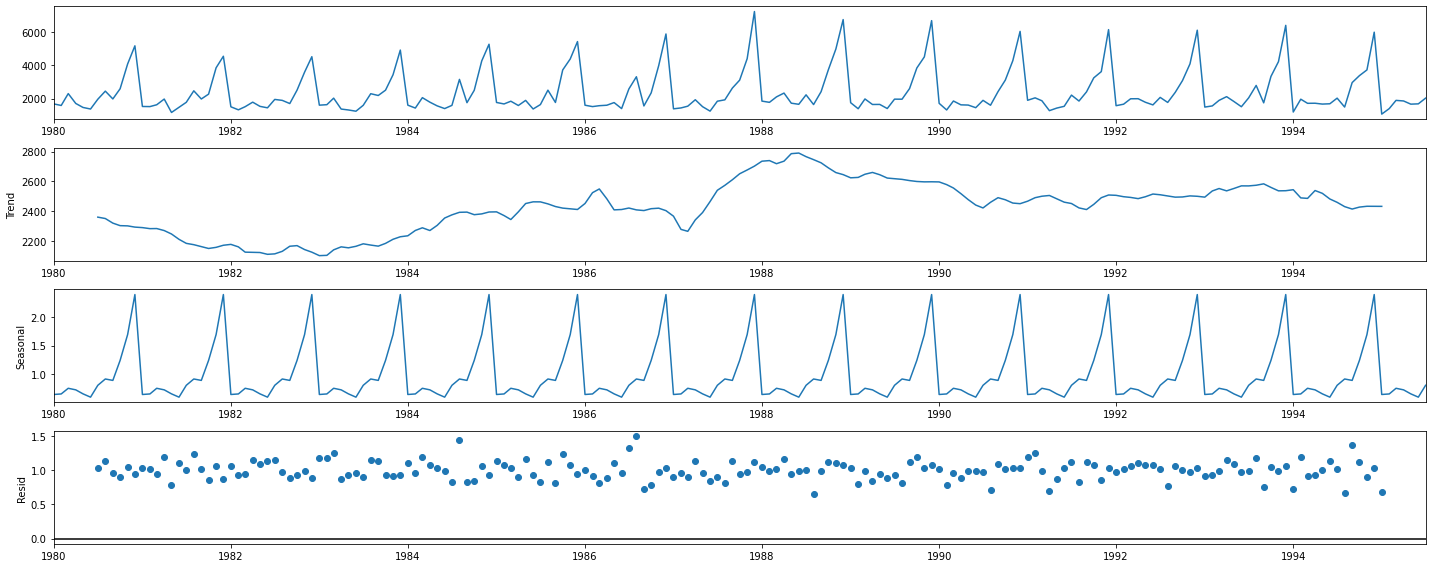

In [29]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [30]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

# 3- Split the data into training and test. The test data should start in 1991

In [31]:
train = df[df.index.year<1991]
test = df[df.index.year>=1991]

In [32]:
train.tail()

Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

In [33]:
test.head()

Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

In [34]:
train.shape, test.shape

((132, 1), (55, 1))

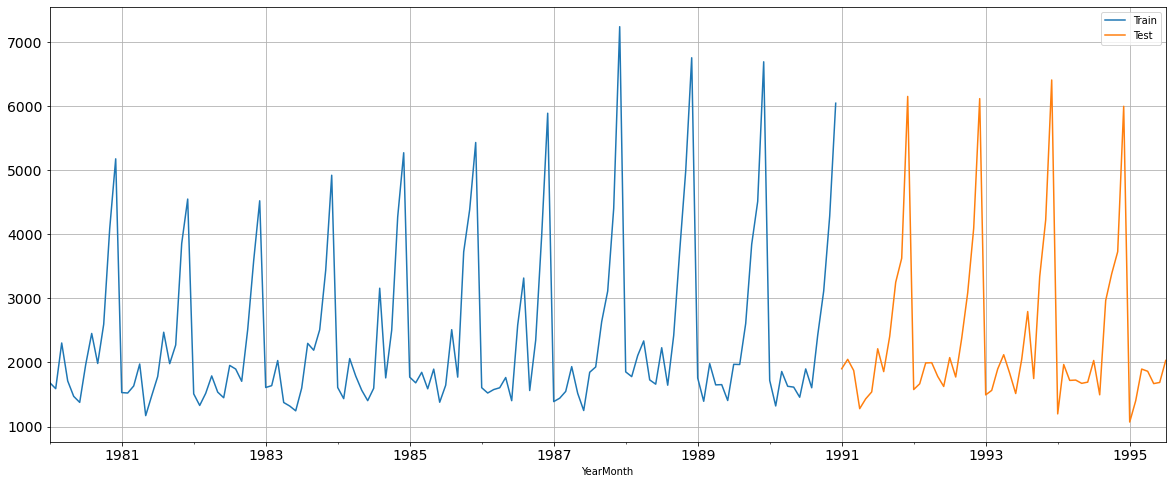

In [35]:
train['Sparkling'].plot(legend = True, label = 'Train', fontsize =14);
test['Sparkling'].plot(legend = True,label = 'Test', fontsize = 14);
plt.grid()

# 4- Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Linear Regression

In [36]:
train_time = [i+1 for i in range(len(train))] # 1 to 132
test_time = [i+133 for i in range(len(test))] # 133 to 187
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [37]:
from IPython.display import display

In [38]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [39]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [40]:
print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

Last few rows of Training Data


Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

First few rows of Test Data


Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137

Last few rows of Test Data


Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

In [44]:
test_predictions_model1= lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [45]:
LinearRegression_test.head(12)

Sparkling  time    RegOnTime
YearMonth                               
1991-01-01       1902   133  2791.652093
1991-02-01       2049   134  2797.484752
1991-03-01       1874   135  2803.317410
1991-04-01       1279   136  2809.150069
1991-05-01       1432   137  2814.982727
1991-06-01       1540   138  2820.815386
1991-07-01       2214   139  2826.648044
1991-08-01       1857   140  2832.480703
1991-09-01       2408   141  2838.313361
1991-10-01       3252   142  2844.146020
1991-11-01       3627   143  2849.978678
1991-12-01       6153   144  2855.811337

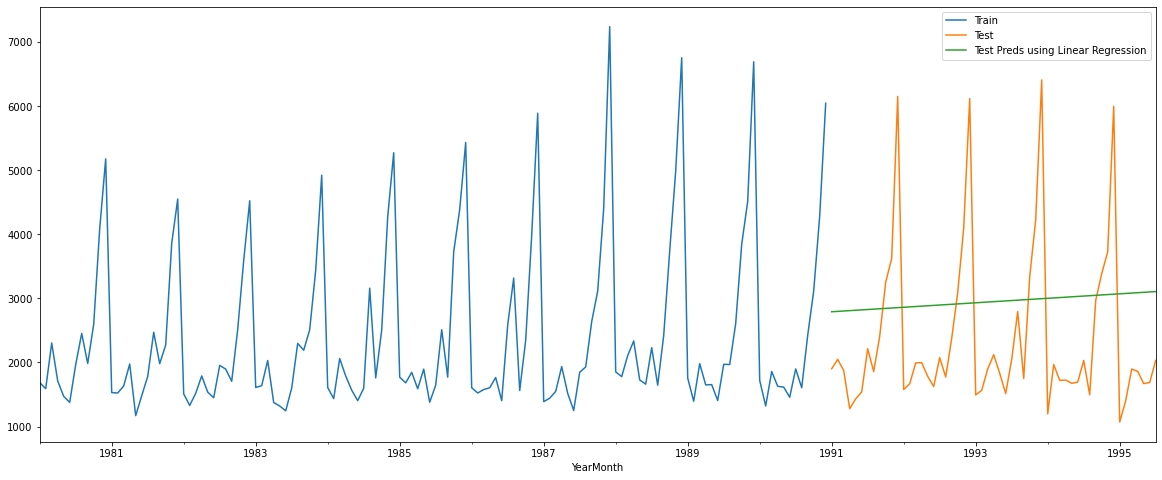

In [46]:
train['Sparkling'].plot(legend = True, label = 'Train')
test['Sparkling'].plot(legend = True, label = 'Test')
LinearRegression_test['RegOnTime'].plot(legend = True, 
                                        label = 'Test Preds using Linear Regression');

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
rmse_model1_test = mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [49]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},
                         index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  1389.135175

### Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [50]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [51]:
NaiveModel_test['naive'] = train['Sparkling'][len(train['Sparkling'])-1]

In [52]:
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

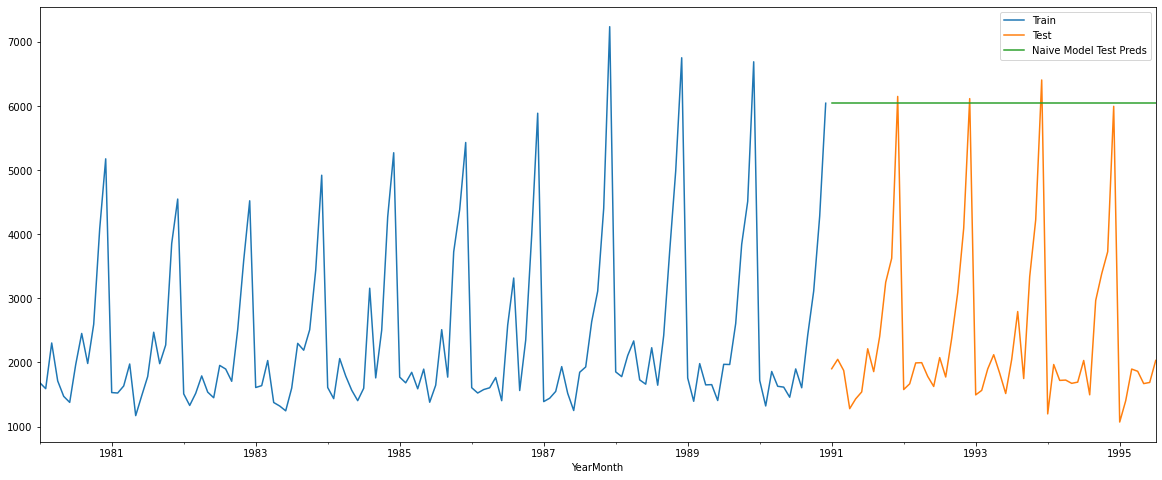

In [53]:
train['Sparkling'].plot(legend = True, label = 'Train')
test['Sparkling'].plot(legend = True, label = 'Test')
NaiveModel_test['naive'].plot(legend = True, label = 'Naive Model Test Preds');

In [54]:
rmse_model2_test = mean_squared_error(NaiveModel_test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For naive model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model2_test))

For naive model forecast on the Test Data,  RMSE is 3864.279 


In [55]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352

### Method 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [56]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [57]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

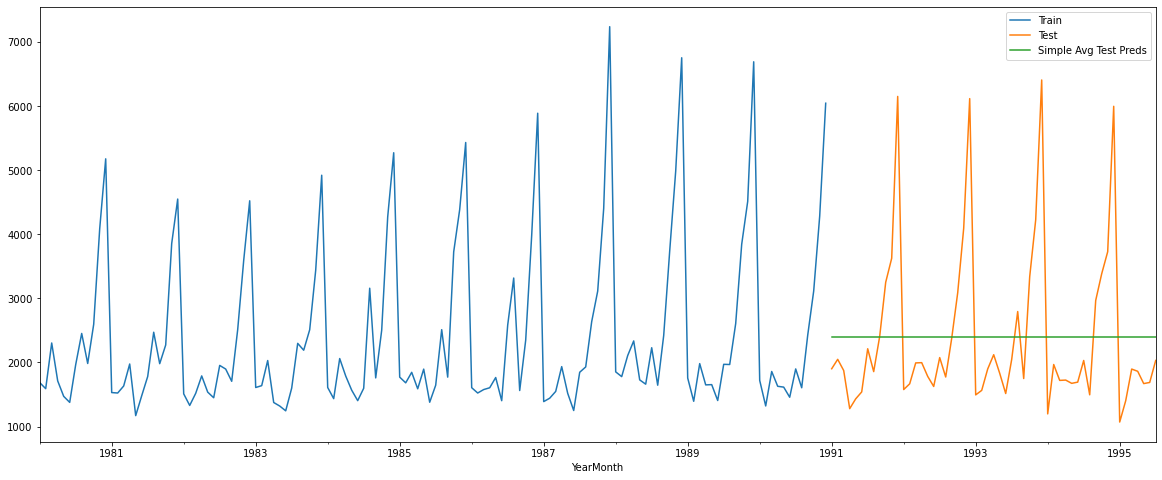

In [58]:
train['Sparkling'].plot(legend = True, label = 'Train')
test['Sparkling'].plot(legend = True, label = 'Test')
SimpleAverage_test['mean_forecast'].plot(legend=True,label= 'Simple Avg Test Preds');

In [59]:
rmse_model3_test = mean_squared_error(SimpleAverage_test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For simple average model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model3_test))

For simple average model forecast on the Test Data,  RMSE is 1275.082 


In [60]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    1389.135175
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

### Method 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [61]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

#### Trailing moving averages

In [62]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head(10)

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
YearMonth                                                              
1980-01-01       1686         NaN         NaN          NaN          NaN
1980-02-01       1591      1638.5         NaN          NaN          NaN
1980-03-01       2304      1947.5         NaN          NaN          NaN
1980-04-01       1712      2008.0     1823.25          NaN          NaN
1980-05-01       1471      1591.5     1769.50          NaN          NaN
1980-06-01       1377      1424.0     1716.00  1690.166667          NaN
1980-07-01       1966      1671.5     1631.50  1736.833333          NaN
1980-08-01       2453      2209.5     1816.75  1880.500000          NaN
1980-09-01       1984      2218.5     1945.00  1827.166667  1838.222222
1980-10-01       2596      2290.0     2249.75  1974.500000  1939.333333

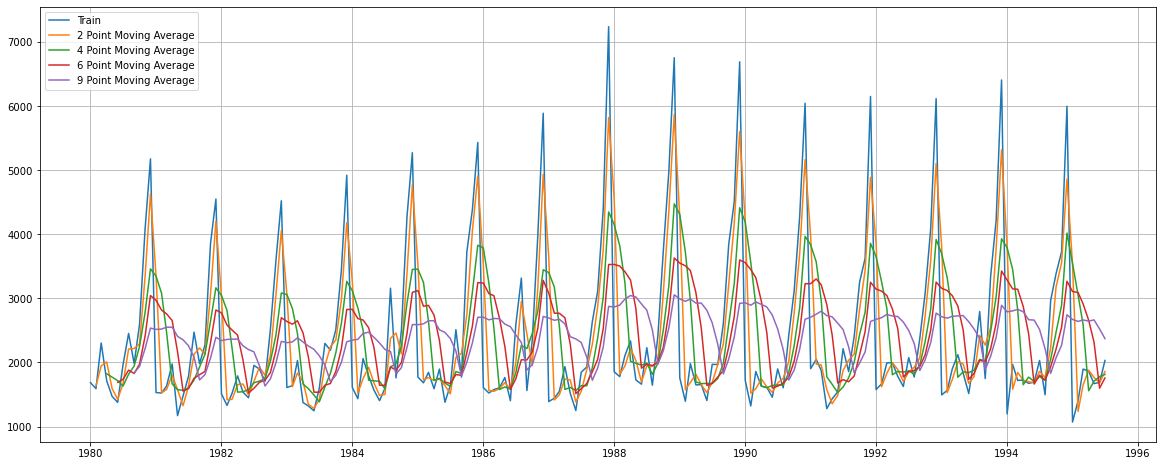

In [63]:
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Split the data into training and test

In [64]:
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year<1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year>=1991]

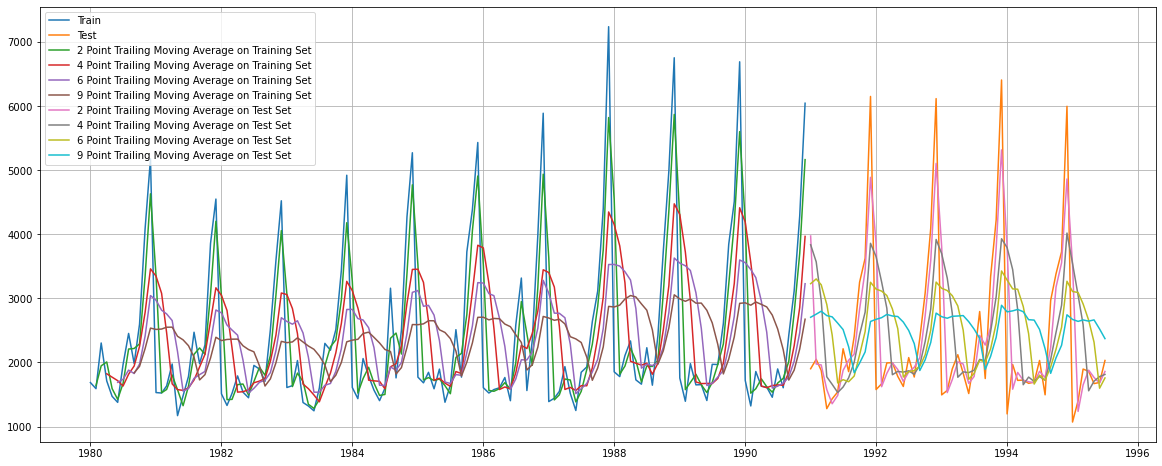

In [65]:
## Plotting on both the Training and Test data

plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [66]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = mean_squared_error(trailing_MovingAverage_test['Sparkling'],
                          trailing_MovingAverage_test['Trailing_2'],squared=False)
rmse_model4_test_2

813.4006839972983

In [67]:
## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = mean_squared_error(trailing_MovingAverage_test['Sparkling'],
                          trailing_MovingAverage_test['Trailing_4'],squared=False)
rmse_model4_test_4

1156.589694081071

In [68]:
## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = mean_squared_error(trailing_MovingAverage_test['Sparkling'],
                          trailing_MovingAverage_test['Trailing_6'],squared=False)
rmse_model4_test_6

1283.9274280129855

In [69]:
## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = mean_squared_error(trailing_MovingAverage_test['Sparkling'],
                          trailing_MovingAverage_test['Trailing_9'],squared=False)
rmse_model4_test_9

1346.2783154241804

In [70]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2, rmse_model4_test_4,rmse_model4_test_6, rmse_model4_test_9]}, index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

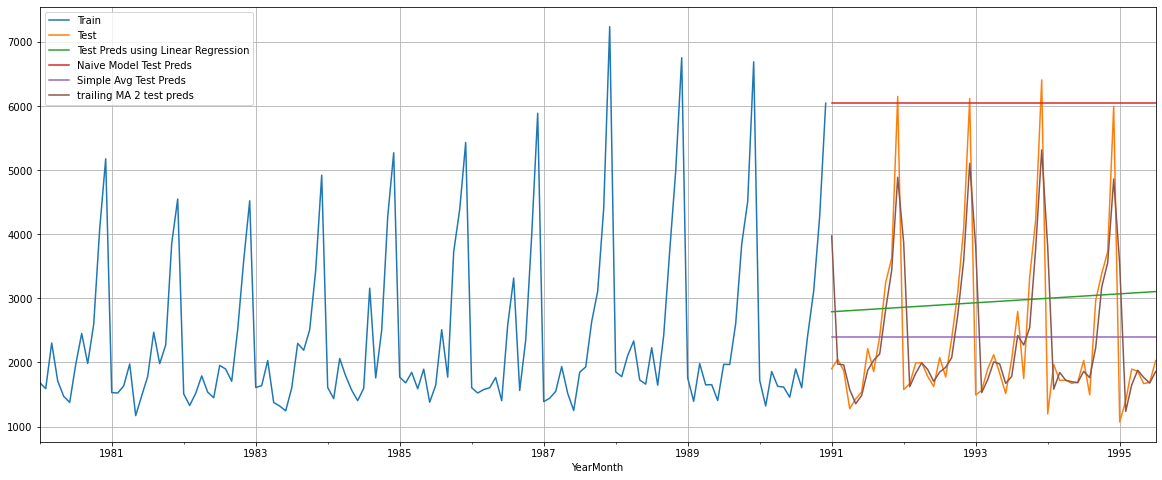

In [71]:
train['Sparkling'].plot(legend = True, label = 'Train')

test['Sparkling'].plot(legend = True, label = 'Test')

LinearRegression_test['RegOnTime'].plot(legend = True, label = 'Test Preds using Linear Regression')

NaiveModel_test['naive'].plot(legend = True, label = 'Naive Model Test Preds')

SimpleAverage_test['mean_forecast'].plot(legend=True,
                                         label= 'Simple Avg Test Preds')

trailing_MovingAverage_test['Trailing_2'].plot(legend=True,
                                              label ='trailing MA 2 test preds');
plt.grid()

### Method 5: Simple Exponential Smoothing

In [72]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [73]:
SES_train = train.copy()
SES_test = test.copy()

In [74]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'],initialization_method='estimated')

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [75]:
model_SES_autofit = model_SES.fit()

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [76]:
model_SES_autofit.params

{'smoothing_level': 0.07028442075641193,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.8402828521703,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [77]:
model_SES_autofit.params_formatted

name        param  optimized
smoothing_level  alpha     0.070284       True
initial_level      l.0  1763.840283       True

In [78]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test)).round(0)
SES_test.head()

Sparkling  predict
YearMonth                     
1991-01-01       1902   2805.0
1991-02-01       2049   2805.0
1991-03-01       1874   2805.0
1991-04-01       1279   2805.0
1991-05-01       1432   2805.0

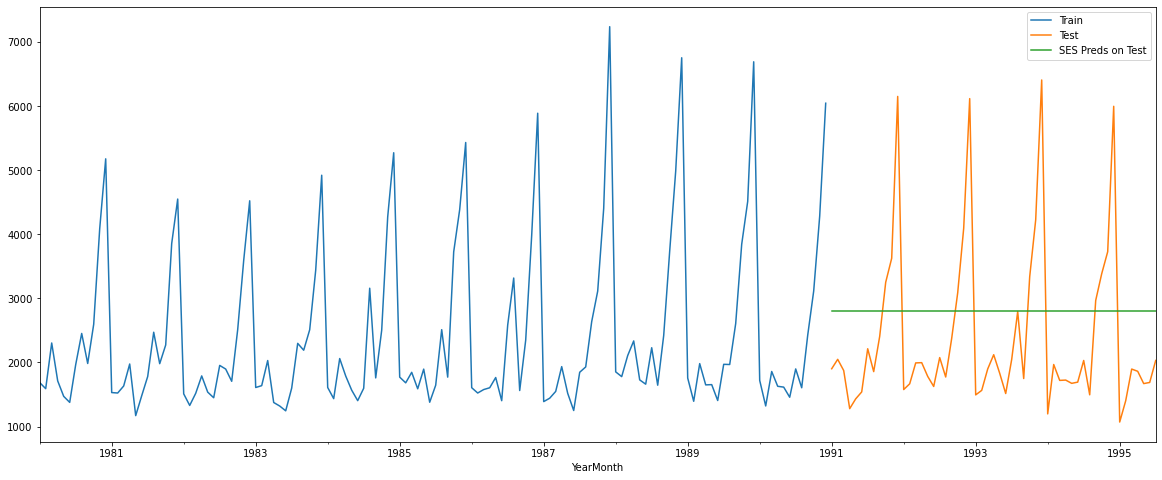

In [79]:
SES_train['Sparkling'].plot(legend=True, label = 'Train')
SES_test['Sparkling'].plot(legend=True, label = 'Test')
SES_test['predict'].plot(legend=True, label = 'SES Preds on Test');

In [80]:
rmse_model5_test_1 = mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For simple exponential smoothing on the Test Data,  RMSE is %3.3f " %(rmse_model5_test_1))

For simple exponential smoothing on the Test Data,  RMSE is 1338.107 


In [81]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.07,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                       1389.135175
NaiveModel                             3864.279352
SimpleAverageModel                     1275.081804
2pointTrailingMovingAverage             813.400684
4pointTrailingMovingAverage            1156.589694
6pointTrailingMovingAverage            1283.927428
9pointTrailingMovingAverage            1346.278315
Alpha=0.07,SimpleExponentialSmoothing  1338.106885

### Method 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [82]:
DES_train = train.copy()
DES_test = test.copy()

In [83]:
model_DES = Holt(DES_train['Sparkling'],initialization_method='estimated')

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [84]:
model_DES_autofit = model_DES.fit()

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [85]:
model_DES_autofit.params

{'smoothing_level': 0.6649999999999999,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1502.1999999999991,
 'initial_trend': 74.87272727272739,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [86]:
model_DES_autofit.params_formatted

name        param  optimized
smoothing_level  alpha     0.665000       True
smoothing_trend   beta     0.000100       True
initial_level      l.0  1502.200000       True
initial_trend      b.0    74.872727       True

In [87]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test)).round(0)
DES_test.head()

Sparkling  predict
YearMonth                     
1991-01-01       1902   5402.0
1991-02-01       2049   5476.0
1991-03-01       1874   5550.0
1991-04-01       1279   5625.0
1991-05-01       1432   5699.0

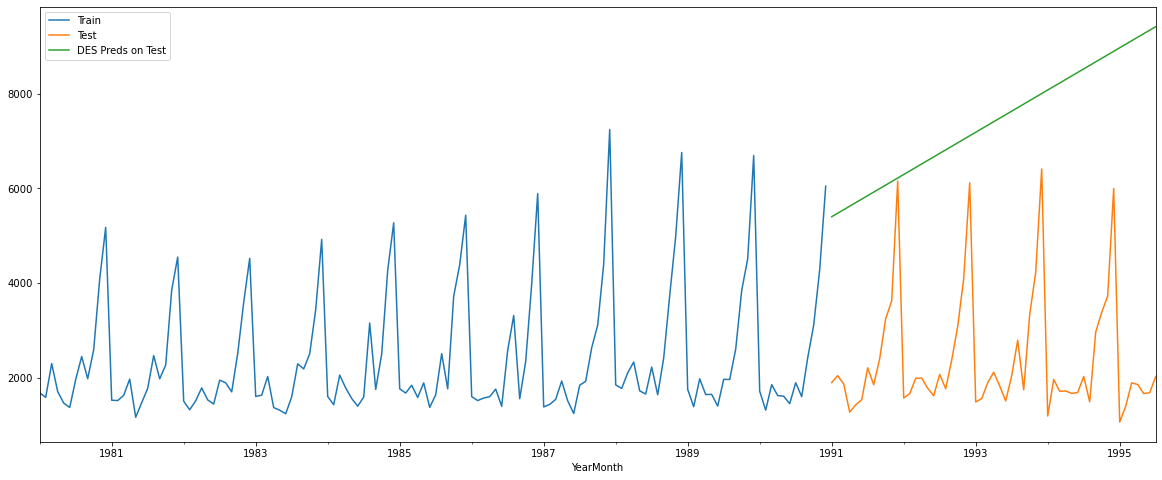

In [88]:
DES_train['Sparkling'].plot(legend=True, label = 'Train')
DES_test['Sparkling'].plot(legend=True, label = 'Test')
DES_test['predict'].plot(legend=True, label = 'DES Preds on Test');

In [89]:
rmse_model6_test_1 = mean_squared_error(DES_test['Sparkling'],DES_test['predict'],squared=False)
print("For double exponential smoothing on the Test Data,  RMSE is %3.3f " %(rmse_model6_test_1))

For double exponential smoothing on the Test Data,  RMSE is 5291.884 


In [90]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]},index=['Alpha=0.665,Beta=0.0001,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.07,SimpleExponentialSmoothing               1338.106885
Alpha=0.665,Beta=0.0001,DoubleExponentialSmoothing  5291.883746

### Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [91]:
TES_train = train.copy()
TES_test = test.copy()

In [92]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],
                                 trend='additive',
                                 seasonal='multiplicative',initialization_method='estimated')

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [93]:
model_TES_autofit = model_TES.fit()

In [94]:
model_TES_autofit.params

{'smoothing_level': 0.11101471561088701,
 'smoothing_trend': 0.0493145907614654,
 'smoothing_seasonal': 0.36244934537370843,
 'damping_trend': nan,
 'initial_level': 2356.496908624238,
 'initial_trend': -9.809526161838415,
 'initial_seasons': array([0.713711  , 0.68278724, 0.90458411, 0.8053878 , 0.65571739,
        0.65388935, 0.88616088, 1.13350811, 0.91894498, 1.21186447,
        1.87099202, 2.37505867]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [95]:
model_TES_autofit.params_formatted

name        param  optimized
smoothing_level     alpha     0.111015       True
smoothing_trend      beta     0.049315       True
smoothing_seasonal  gamma     0.362449       True
initial_level         l.0  2356.496909       True
initial_trend         b.0    -9.809526       True
initial_seasons.0     s.0     0.713711       True
initial_seasons.1     s.1     0.682787       True
initial_seasons.2     s.2     0.904584       True
initial_seasons.3     s.3     0.805388       True
initial_seasons.4     s.4     0.655717       True
initial_seasons.5     s.5     0.653889       True
initial_seasons.6     s.6     0.886161       True
initial_seasons.7     s.7     1.133508       True
initial_seasons.8     s.8     0.918945       True
initial_seasons.9     s.9     1.211864       True
initial_seasons.10   s.10     1.870992       True
initial_seasons.11   s.11     2.375059       True

In [96]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test)).round(0)

TES_test.head()

Sparkling  auto_predict
YearMonth                          
1991-01-01       1902        1588.0
1991-02-01       2049        1357.0
1991-03-01       1874        1763.0
1991-04-01       1279        1657.0
1991-05-01       1432        1542.0

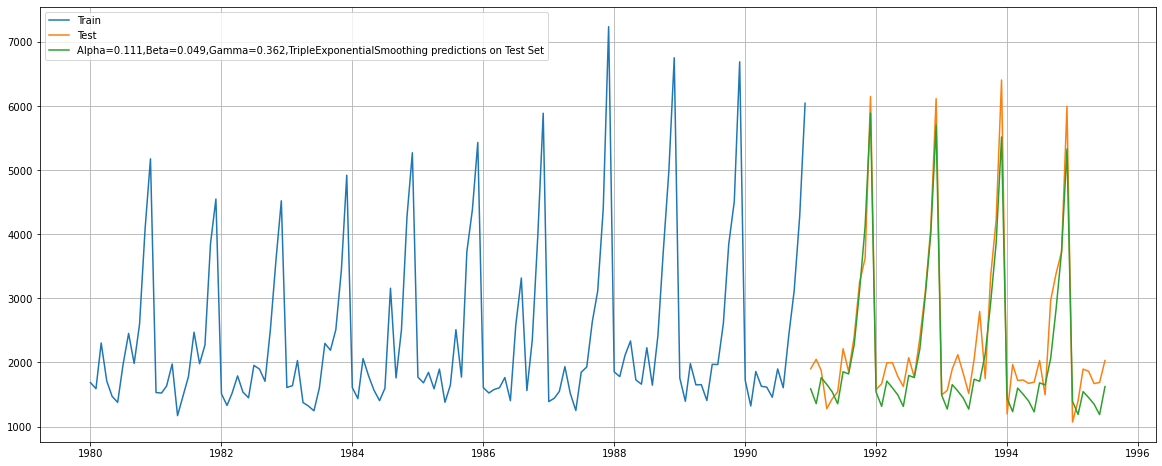

In [97]:
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [98]:
rmse_model7_test_1 = mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For triple exponential smoothing on the Test Data,  RMSE is %3.3f " %(rmse_model7_test_1))

For triple exponential smoothing on the Test Data,  RMSE is 402.923 


In [99]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]}
                           ,index=['Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf.round(0)

Test RMSE
RegressionOnTime                                       1389.0
NaiveModel                                             3864.0
SimpleAverageModel                                     1275.0
2pointTrailingMovingAverage                             813.0
4pointTrailingMovingAverage                            1157.0
6pointTrailingMovingAverage                            1284.0
9pointTrailingMovingAverage                            1346.0
Alpha=0.07,SimpleExponentialSmoothing                  1338.0
Alpha=0.665,Beta=0.0001,DoubleExponentialSmoothing     5292.0
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...      403.0

#### Identifying Optimum Values of 𝛼 , 𝛽 and 𝛾

In [105]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [106]:
alpha_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
beta_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
gamma_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [107]:
from statsmodels.tools.eval_measures import rmse

for i in alpha_list:
    for j in beta_list:
        for k in gamma_list:
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,
                                                  smoothing_trend=j,
                                                  smoothing_seasonal=k)
            
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test))
        
            rmse_model8_train = rmse(TES_train['Sparkling'],
                                     TES_train['predict',i,j,k])
            
            rmse_model8_test = rmse(TES_test['Sparkling'],
                                    TES_test['predict',i,j,k])
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,
                                                  'Beta Values':j,
                                                  'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,
                                                  'Test RMSE':rmse_model8_test},ignore_index=True)

In [108]:
TES_test.head().round(0)

Sparkling  auto_predict  (predict, 0.1, 0.1, 0.1)  \
YearMonth                                                       
1991-01-01       1902        1588.0                    1597.0   
1991-02-01       2049        1357.0                    1456.0   
1991-03-01       1874        1763.0                    1802.0   
1991-04-01       1279        1657.0                    1696.0   
1991-05-01       1432        1542.0                    1518.0   

            (predict, 0.1, 0.1, 0.2)  (predict, 0.1, 0.1, 0.3)  \
YearMonth                                                        
1991-01-01                    1580.0                    1565.0   
1991-02-01                    1408.0                    1357.0   
1991-03-01                    1760.0                    1730.0   
1991-04-01                    1668.0                    1632.0   
1991-05-01                    1513.0                    1501.0   

            (predict, 0.1, 0.1, 0.4)  (predict, 0.1, 0.1, 0.5)  \
YearMonth                                                        
1991-01-01                    1560.0                    1563.0   
1991-02-01                    1314.0                    1283.0   
1991-03-01                    1717.0                    1716.0   
1991-04-01                    1599.0                    1570.0   
1991-05-01                    1490.0                    1484.0   

            (predict, 0.1, 0.1, 0.6)  (predict, 0.1, 0.1, 0.7)  \
YearMonth                                                        
1991-01-01                    1570.0                    1576.0   
1991-02-01                    1259.0                    1241.0   
1991-03-01                    1720.0                    1722.0   
1991-04-01                    1546.0                    1526.0   
1991-05-01                    1484.0                    1486.0   

            (predict, 0.1, 0.1, 0.8)  ...  (predict, 1.0, 1.0, 0.1)  \
YearMonth                             ...                             
1991-01-01                    1579.0  ...                    1701.0   
1991-02-01                    1225.0  ...                    2167.0   
1991-03-01                    1718.0  ...                    3461.0   
1991-04-01                    1508.0  ...                    2980.0   
1991-05-01                    1486.0  ...                    3063.0   

            (predict, 1.0, 1.0, 0.2)  (predict, 1.0, 1.0, 0.3)  \
YearMonth                                                        
1991-01-01                    1418.0                   -3552.0   
1991-02-01                    1313.0                   -5984.0   
1991-03-01                    2080.0                  -14913.0   
1991-04-01                     907.0                  -31170.0   
1991-05-01                     445.0                 -305980.0   

            (predict, 1.0, 1.0, 0.4)  (predict, 1.0, 1.0, 0.5)  \
YearMonth                                                        
1991-01-01                  -40829.0                  -10400.0   
1991-02-01                  392353.0                   -7263.0   
1991-03-01                   81702.0                    -585.0   
1991-04-01                 -160180.0                   38403.0   
1991-05-01                 -272138.0                 -125008.0   

            (predict, 1.0, 1.0, 0.6)  (predict, 1.0, 1.0, 0.7)  \
YearMonth                                                        
1991-01-01                   -6686.0                  -43317.0   
1991-02-01                   -7363.0                   60124.0   
1991-03-01                   12904.0                  361859.0   
1991-04-01                  -14039.0                  464778.0   
1991-05-01                   42092.0                 2486380.0   

            (predict, 1.0, 1.0, 0.8)  (predict, 1.0, 1.0, 0.9)  \
YearMonth                                                        
1991-01-01                     392.0                     -91.0   
1991-02-01                      14.0                    -631.0   
1991-03-01      

In [109]:
resultsDf_8_2.round(1)

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
0             0.1          0.1           0.1       357.8      610.2
1             0.1          0.1           0.2       360.0      626.3
2             0.1          0.1           0.3       358.0      640.0
3             0.1          0.1           0.4       358.7      644.7
4             0.1          0.1           0.5       362.7      641.1
..            ...          ...           ...         ...        ...
995           1.0          1.0           0.6    188299.4  4386054.2
996           1.0          1.0           0.7    266001.5  8649577.3
997           1.0          1.0           0.8   1101923.4   270043.5
998           1.0          1.0           0.9     76957.1   247220.1
999           1.0          1.0           1.0     24560.5   125691.4

[1000 rows x 5 columns]

In [110]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
211           0.3          0.2           0.2  378.414748  314.887120
301           0.4          0.1           0.2  374.765197  317.310141
300           0.4          0.1           0.1  370.612639  318.103482
402           0.5          0.1           0.3  390.175608  325.544828
30            0.1          0.4           0.1  400.768319  331.256744

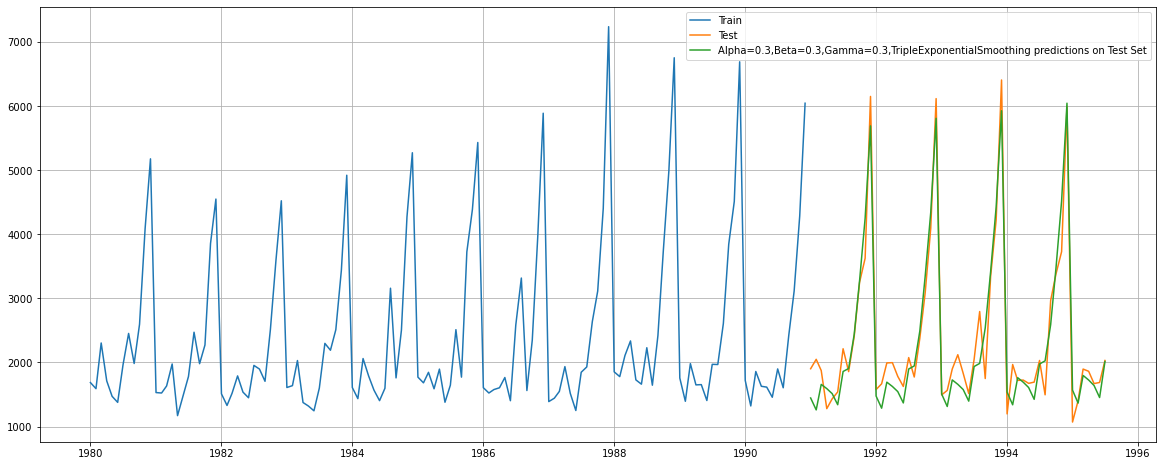

In [617]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [618]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf.round(0)

Test RMSE
RegressionOnTime                                       1389.0
NaiveModel                                             3864.0
SimpleAverageModel                                     1275.0
2pointTrailingMovingAverage                             813.0
4pointTrailingMovingAverage                            1157.0
6pointTrailingMovingAverage                            1284.0
9pointTrailingMovingAverage                            1346.0
Alpha=0.07,SimpleExponentialSmoothing                  1338.0
Alpha=0.665,Beta=0.0001,DoubleExponentialSmoothing     5292.0
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...      403.0
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...      344.0

# 5- Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.

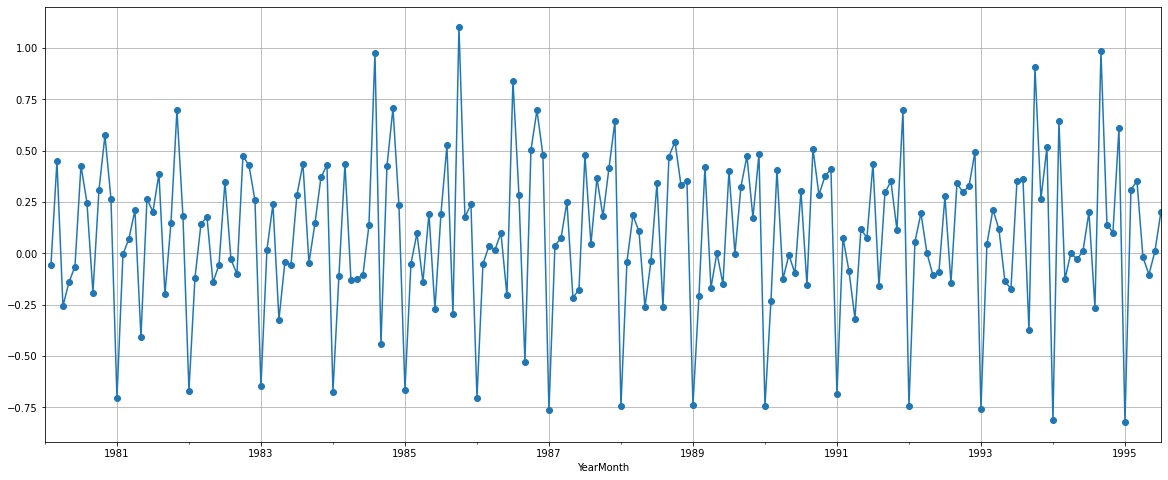

In [619]:
# Ploting month on month percentage sale
pct_change = df["Sparkling"].pct_change()

pct_change.plot(marker='o');
plt.grid()

### Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [620]:
from statsmodels.tsa.stattools import adfuller

In [621]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.798
DF test p-value is 0.705595845993243
Number of lags used 12


We see that at 5% significant level the Time Series is non-stationary as at high p-value we are unable to reject the null hypothesis.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

In [622]:
df['Sparkling'].diff()

YearMonth
1980-01-01      NaN
1980-02-01    -95.0
1980-03-01    713.0
1980-04-01   -592.0
1980-05-01   -241.0
              ...  
1995-03-01    495.0
1995-04-01    -35.0
1995-05-01   -192.0
1995-06-01     18.0
1995-07-01    343.0
Name: Sparkling, Length: 187, dtype: float64

In [623]:
adfuller(df['Sparkling'].diff().dropna())[1] # d -->1

0.0

We see that at  𝛼  = 0.05 the Time Series is indeed stationary as the p-value is lower than 0.05 and hence we can reject the null hypothesis which says that the time series is not stationary. So differentiation by 1 makes the time series stationary.

### Check for stationarity of the training part of Time Series data.

In [624]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593686
Number of lags used 12


For training set also the p-value is more than 0.05 so we failed to reject the NULL hypothesis means train data is non stationary

Lets apply differencing by 1

In [625]:
adfuller(train['Sparkling'].diff().dropna())[1] # d -->1

2.280104355826052e-12

The p-Value is less than 0.05 means differentiation by 1 makes training data time series stationary

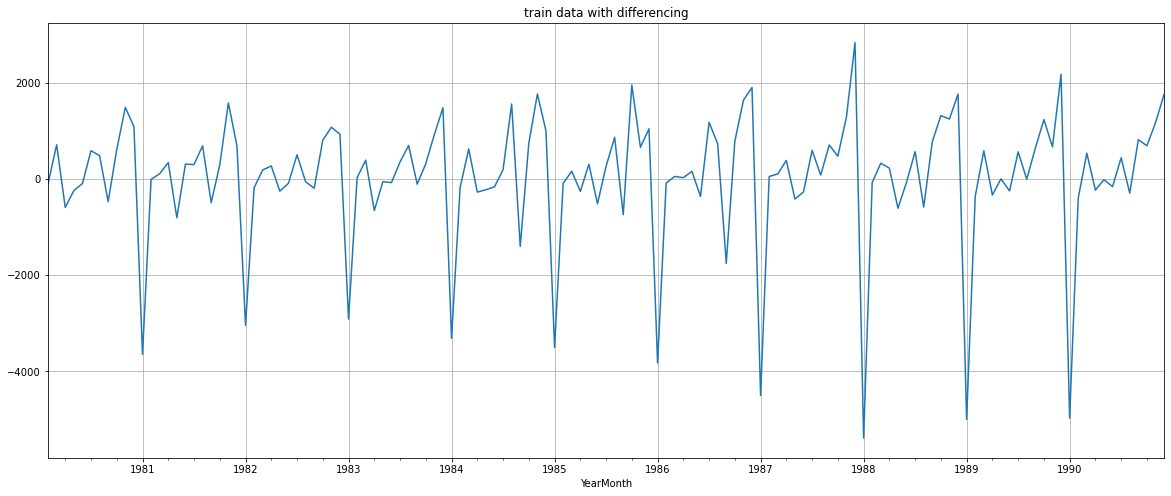

In [626]:
train['Sparkling'].diff().dropna().plot(grid=True,title='train data with differencing');

# 6- Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### ARIMA model

In [627]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [628]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [629]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015592133
ARIMA(0, 1, 2) - AIC:2234.4083231291497
ARIMA(0, 1, 3) - AIC:2233.9948577420064
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946704996
ARIMA(1, 1, 2) - AIC:2234.5272004521435
ARIMA(1, 1, 3) - AIC:2235.6078163476477
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.777626308103
ARIMA(2, 1, 2) - AIC:2213.5092123973454
ARIMA(2, 1, 3) - AIC:2232.9305188226363
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.4988428729475
ARIMA(3, 1, 2) - AIC:2230.7666102201465
ARIMA(3, 1, 3) - AIC:2221.461700336058


In [630]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
10  (2, 1, 2)  2213.509212
15  (3, 1, 3)  2221.461700
14  (3, 1, 2)  2230.766610
11  (2, 1, 3)  2232.930519
9   (2, 1, 1)  2233.777626

In [631]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 06 Feb 2022   AIC                           2213.509
Time:                        00:59:17   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

In [632]:
import warnings
warnings.filterwarnings("ignore")

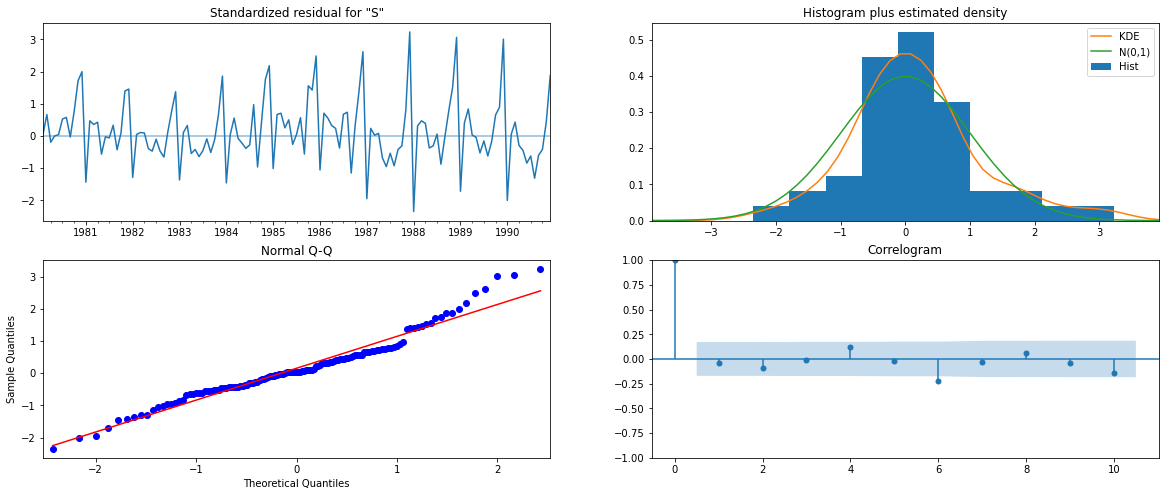

In [633]:
results_auto_ARIMA.plot_diagnostics();

Predict on test set using this model

In [634]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [635]:
ARIMA_rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print("For ARIMA on the Test Data,  RMSE is %3.3f " %(ARIMA_rmse))

For ARIMA on the Test Data,  RMSE is 1299.980 


In [636]:
resultsDf_ARIMA = pd.DataFrame({'Test RMSE': [ARIMA_rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_ARIMA])
resultsDf.round(0)

Test RMSE
RegressionOnTime                                       1389.0
NaiveModel                                             3864.0
SimpleAverageModel                                     1275.0
2pointTrailingMovingAverage                             813.0
4pointTrailingMovingAverage                            1157.0
6pointTrailingMovingAverage                            1284.0
9pointTrailingMovingAverage                            1346.0
Alpha=0.07,SimpleExponentialSmoothing                  1338.0
Alpha=0.665,Beta=0.0001,DoubleExponentialSmoothing     5292.0
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...      403.0
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...      344.0
ARIMA(2,1,2)                                           1300.0

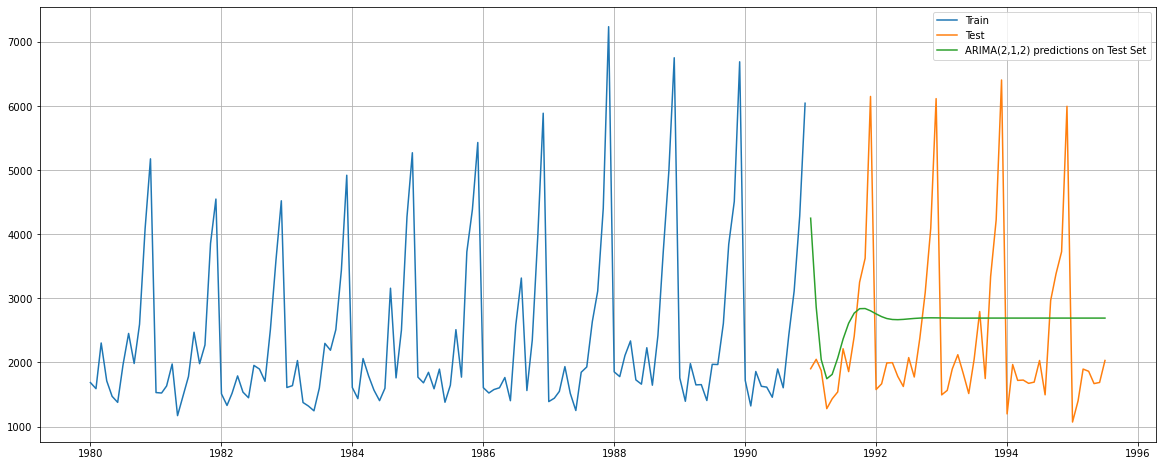

In [637]:
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_auto_ARIMA, label='ARIMA(2,1,2) predictions on Test Set')


plt.legend(loc='best')
plt.grid();

### SARIMA Model - with 6 months seasonality

In [638]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [639]:
SARIMA_AIC_6 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_6

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [640]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC_6 = SARIMA_AIC_6.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.37807617163
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536890585
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1863.7845154973647
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559984443069
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360111349918
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1803.3929094902353
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.401298687227
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510616
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.917780566468
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1725.537642554928
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1748.762266815527
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1750.6879953816667
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1739.4489858031266
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1725.0138752342657
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.565285908281
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:19

SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1763.267486221418
SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1743.874204848845
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:1661.5451335726466
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:1676.1994485061136
SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:1673.587863828157
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:1661.3424671711482
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:1663.329923558228
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:2176.8681147720986
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:2068.7780920260484
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1889.7875404563074
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1797.0726418435138
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:2074.110221743637
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1955.605894961843
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1836.906711796735
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:1715.807069721841
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1763.2728191323852
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1760.826743651972
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1782.3399601077729
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:16

In [641]:
SARIMA_AIC_6.sort_values(by=['AIC']).head()

param      seasonal          AIC
187  (2, 1, 3)  (2, 0, 3, 6)  1629.052120
251  (3, 1, 3)  (2, 0, 3, 6)  1631.005593
59   (0, 1, 3)  (2, 0, 3, 6)  1633.327862
123  (1, 1, 3)  (2, 0, 3, 6)  1634.094422
63   (0, 1, 3)  (3, 0, 3, 6)  1635.054426

In [642]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -803.526
Date:                           Sun, 06 Feb 2022   AIC                           1629.052
Time:                                   01:10:39   BIC                           1658.657
Sample:                               01-01-1980   HQIC                          1641.058
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7440      0.066    -26.565      0.000      -1.873      -1.615
ar.L2         -0.7865      0.070    -11.220

In [643]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [644]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1343.839725  366.644337     625.230030    2062.449420
1991-02-01   988.988134  385.029621     234.343944    1743.632325
1991-03-01  1648.050927  385.271802     892.932070    2403.169784
1991-04-01  1571.256103  395.962356     795.184147    2347.328060
1991-05-01  1169.127003  396.125021     392.736228    1945.517777

In [645]:
SARIMA_rmse_6 = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print("For SARIMA on the Test Data for 6 months seasonality,  RMSE is %3.3f " %(SARIMA_rmse_6))

For SARIMA on the Test Data for 6 months seasonality,  RMSE is 825.795 


In [646]:
resultsDf_SARIMA_6 = pd.DataFrame({'Test RMSE': [SARIMA_rmse_6]}
                           ,index=['SARIMA(2,1,3)(2,0,3,6)'])

resultsDf = pd.concat([resultsDf, resultsDf_SARIMA_6])
resultsDf.round(0)

Test RMSE
RegressionOnTime                                       1389.0
NaiveModel                                             3864.0
SimpleAverageModel                                     1275.0
2pointTrailingMovingAverage                             813.0
4pointTrailingMovingAverage                            1157.0
6pointTrailingMovingAverage                            1284.0
9pointTrailingMovingAverage                            1346.0
Alpha=0.07,SimpleExponentialSmoothing                  1338.0
Alpha=0.665,Beta=0.0001,DoubleExponentialSmoothing     5292.0
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...      403.0
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...      344.0
ARIMA(2,1,2)                                           1300.0
SARIMA(2,1,3)(2,0,3,6)                                  826.0

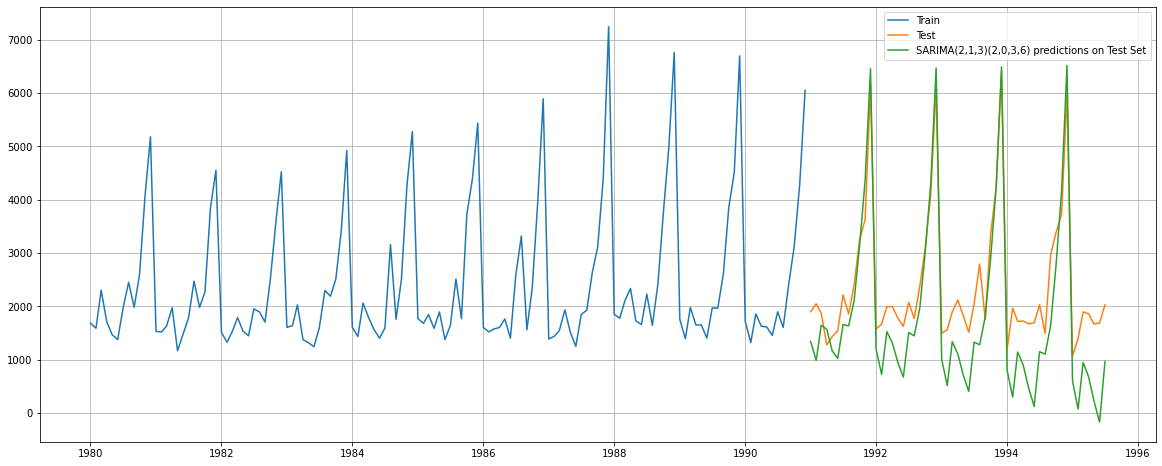

In [647]:
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_auto_SARIMA_6.predicted_mean, label='SARIMA(2,1,3)(2,0,3,6) predictions on Test Set')


plt.legend(loc='best')
plt.grid();

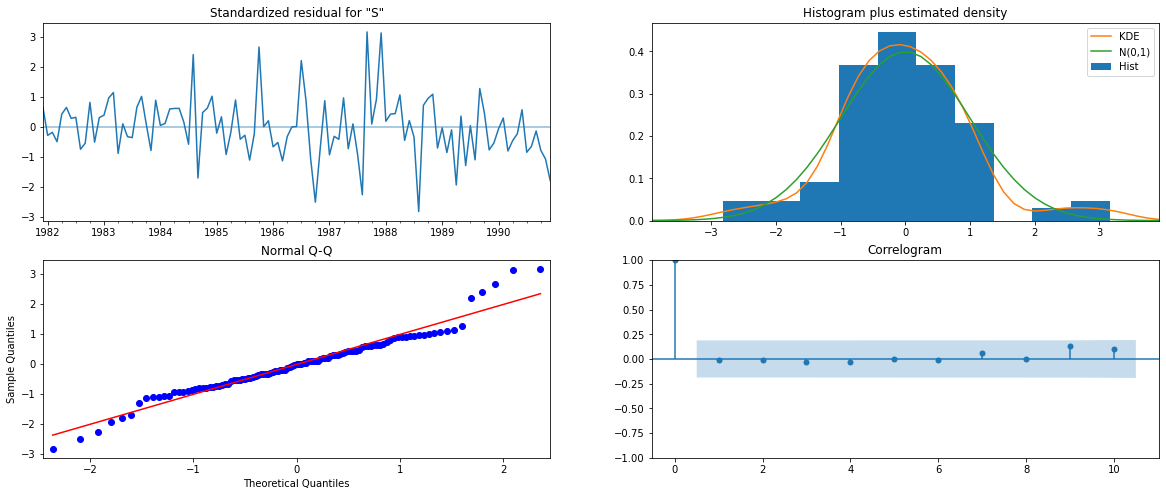

In [648]:
results_auto_SARIMA_6.plot_diagnostics();

### SARIMA Model - with 12 months seasonality

In [649]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [650]:
SARIMA_AIC_12 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_12

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [651]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC_12 = SARIMA_AIC_12.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616845315
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236032
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.436602245668
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389776
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791726
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158604901
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.989805392084
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566435
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572999903
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881837643
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319380044
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144560762
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954179886
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245084042036
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018823976103
SARIMA(0, 1, 2

In [652]:
SARIMA_AIC_12.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934564
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121565
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [653]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 06 Feb 2022   AIC                           1555.584
Time:                                    01:20:01   BIC                           1574.095
Sample:                                01-01-1980   HQIC                          1563.083
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

In [654]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [655]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1327.385682  388.343707     566.246002    2088.525361
1991-02-01  1315.127259  402.007354     527.207323    2103.047194
1991-03-01  1621.591592  402.000958     833.684193    2409.498992
1991-04-01  1598.879086  407.238889     800.705530    2397.052642
1991-05-01  1392.693371  407.968895     593.089030    2192.297712

In [656]:
SARIMA_rmse_12 = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print("For SARIMA on the Test Data for 12 months seasonality,  RMSE is %3.3f " %(SARIMA_rmse_12))

For SARIMA on the Test Data for 12 months seasonality,  RMSE is 528.607 


In [657]:
resultsDf_SARIMA_12 = pd.DataFrame({'Test RMSE': [SARIMA_rmse_12]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_SARIMA_12])
resultsDf.round(0)

Test RMSE
RegressionOnTime                                       1389.0
NaiveModel                                             3864.0
SimpleAverageModel                                     1275.0
2pointTrailingMovingAverage                             813.0
4pointTrailingMovingAverage                            1157.0
6pointTrailingMovingAverage                            1284.0
9pointTrailingMovingAverage                            1346.0
Alpha=0.07,SimpleExponentialSmoothing                  1338.0
Alpha=0.665,Beta=0.0001,DoubleExponentialSmoothing     5292.0
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...      403.0
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...      344.0
ARIMA(2,1,2)                                           1300.0
SARIMA(2,1,3)(2,0,3,6)                                  826.0
SARIMA(1,1,2)(1,0,2,12)                                 529.0

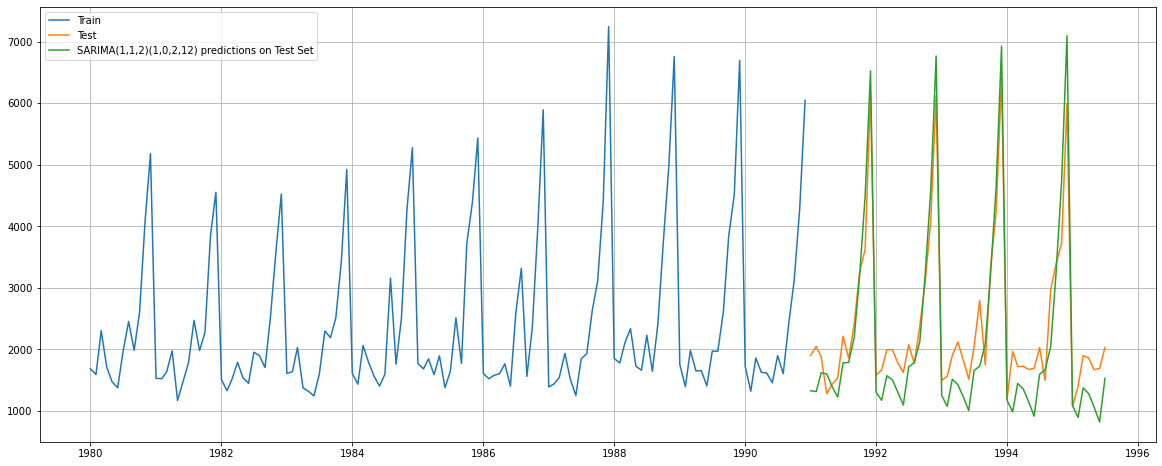

In [658]:
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_auto_SARIMA_12.predicted_mean, label='SARIMA(1,1,2)(1,0,2,12) predictions on Test Set')


plt.legend(loc='best')
plt.grid();

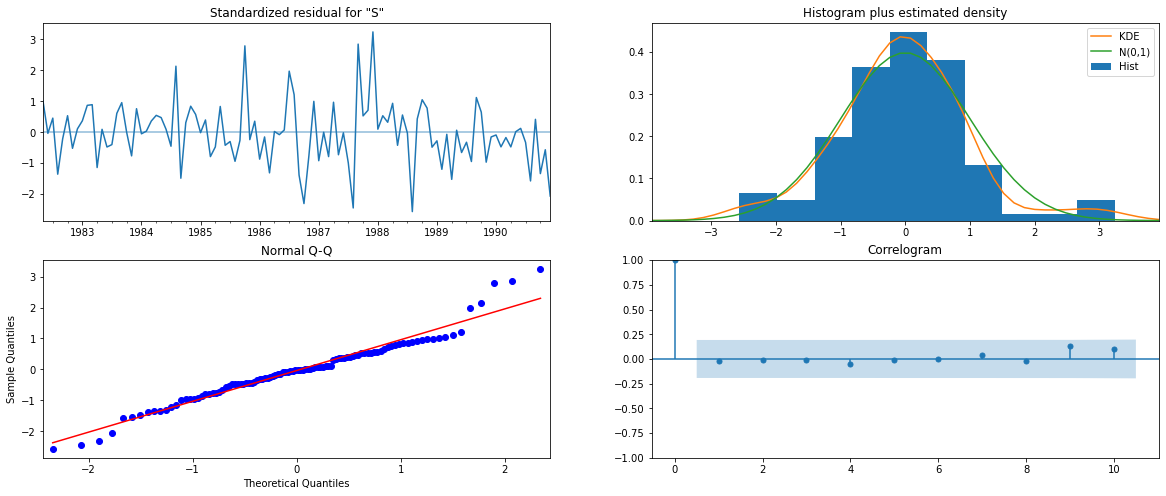

In [659]:
results_auto_SARIMA_12.plot_diagnostics();

# 7- Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

In [660]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

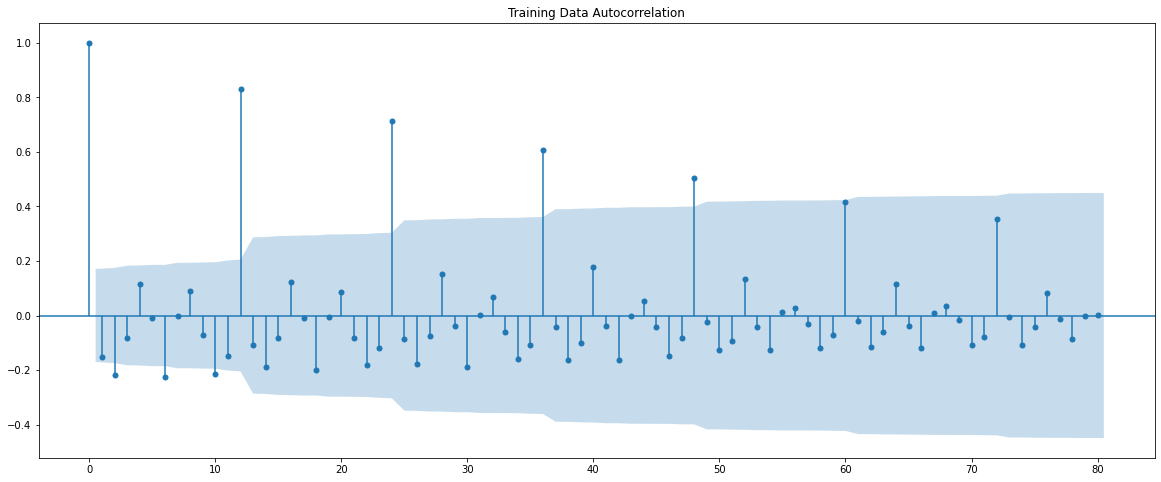

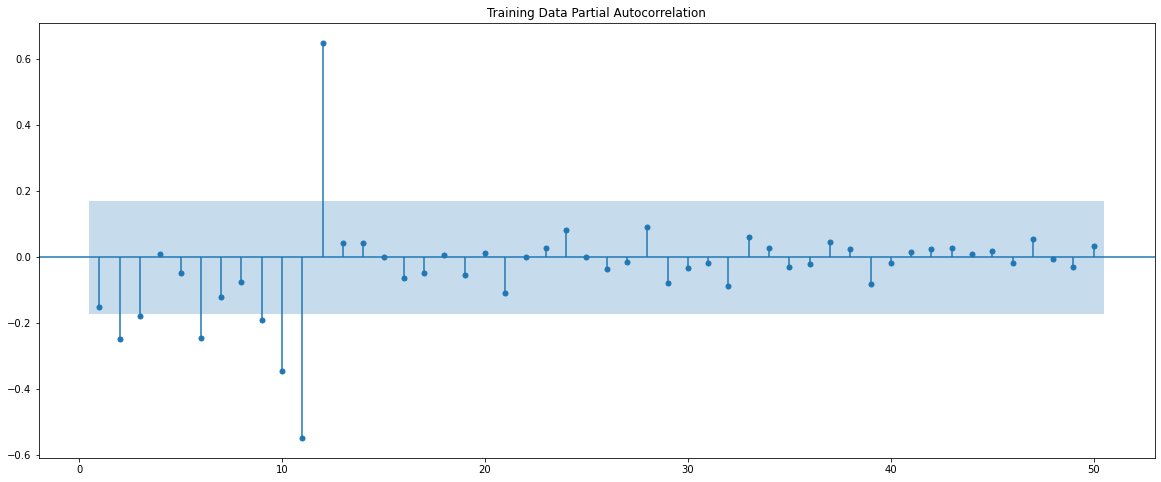

In [661]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop',lags=80)
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle',lags=50)
plt.show()

### ARIMA

In [662]:
manual_ARIMA = ARIMA(train, order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sun, 06 Feb 2022   AIC                           2267.663
Time:                        01:22:50   BIC                           2270.538
Sample:                    01-01-1980   HQIC                          2268.831
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

In [663]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [664]:
manual_ARIMA_rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
print("For manual ARIMA on the Test Data,  RMSE is %3.3f " %(manual_ARIMA_rmse))

For manual ARIMA on the Test Data,  RMSE is 3864.279 


In [665]:
resultsDf_manual_ARIMA = pd.DataFrame({'Test RMSE': [ARIMA_rmse]}
                           ,index=['ARIMA(0,1,0)'])

resultsDf = pd.concat([resultsDf, resultsDf_manual_ARIMA])
resultsDf.round(0)

Test RMSE
RegressionOnTime                                       1389.0
NaiveModel                                             3864.0
SimpleAverageModel                                     1275.0
2pointTrailingMovingAverage                             813.0
4pointTrailingMovingAverage                            1157.0
6pointTrailingMovingAverage                            1284.0
9pointTrailingMovingAverage                            1346.0
Alpha=0.07,SimpleExponentialSmoothing                  1338.0
Alpha=0.665,Beta=0.0001,DoubleExponentialSmoothing     5292.0
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...      403.0
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...      344.0
ARIMA(2,1,2)                                           1300.0
SARIMA(2,1,3)(2,0,3,6)                                  826.0
SARIMA(1,1,2)(1,0,2,12)                                 529.0
ARIMA(0,1,0)                                           1300.0

### SARIMA

In [666]:
from  statsmodels.tsa.statespace.sarimax import SARIMAX

In [667]:
manual_SARIMA =SARIMAX(train['Sparkling'],
                                order=(0, 1, 0),
                                seasonal_order=(1, 0, 4, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)

print(results_manual_SARIMA.summary())

                                           SARIMAX Results                                           
Dep. Variable:                                     Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 0, [1, 2, 3, 4], 12)   Log Likelihood                -632.314
Date:                                       Sun, 06 Feb 2022   AIC                           1276.628
Time:                                               01:24:59   BIC                           1291.068
Sample:                                           01-01-1980   HQIC                          1282.426
                                                - 12-01-1990                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       1.0333     

In [669]:
predicted_manual_SARIMA = results_manual_SARIMA.forecast(steps=len(test))

In [670]:
manual_SARIMA_rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA,squared=False)
print("For manual SARIMA on the Test Data,  RMSE is %3.3f " %(manual_SARIMA_rmse))

For manual SARIMA on the Test Data,  RMSE is 1159.016 


In [671]:
resultsDf_manual_ARIMA = pd.DataFrame({'Test RMSE': [manual_SARIMA_rmse]}
                           ,index=['SARIMA(0,1,0)(1,0,3,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_manual_ARIMA])
resultsDf.round(0)

Test RMSE
RegressionOnTime                                       1389.0
NaiveModel                                             3864.0
SimpleAverageModel                                     1275.0
2pointTrailingMovingAverage                             813.0
4pointTrailingMovingAverage                            1157.0
6pointTrailingMovingAverage                            1284.0
9pointTrailingMovingAverage                            1346.0
Alpha=0.07,SimpleExponentialSmoothing                  1338.0
Alpha=0.665,Beta=0.0001,DoubleExponentialSmoothing     5292.0
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...      403.0
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...      344.0
ARIMA(2,1,2)                                           1300.0
SARIMA(2,1,3)(2,0,3,6)                                  826.0
SARIMA(1,1,2)(1,0,2,12)                                 529.0
ARIMA(0,1,0)                                           1300.0
SARIMA(0,1,0)(1,0,3,12)                                1159.0

# 8- Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [672]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...   343.859889
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   402.923002
SARIMA(1,1,2)(1,0,2,12)                              528.607036
2pointTrailingMovingAverage                          813.400684
SARIMA(2,1,3)(2,0,3,6)                               825.795200
4pointTrailingMovingAverage                         1156.589694
SARIMA(0,1,0)(1,0,3,12)                             1159.015536
SimpleAverageModel                                  1275.081804
6pointTrailingMovingAverage                         1283.927428
ARIMA(2,1,2)                                        1299.980353
ARIMA(0,1,0)                                        1299.980353
Alpha=0.07,SimpleExponentialSmoothing               1338.106885
9pointTrailingMovingAverage                         1346.278315
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
Alpha=0.665,Beta=0.0001,DoubleExponentialSmoothing  5291.883746

# 9- Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

Based on the RMSE values, the triple exponential smoothing with Alpha=0.3,Beta=0.3,Gamma=0.3 is our optimum model. We will use the this model and these parameters to train the model on full dataset

In [673]:
fullmodel1 = ExponentialSmoothing(df,trend='additive',seasonal='multiplicative')
fullmodel1= fullmodel1.fit(smoothing_level=0.3, smoothing_trend=0.3, smoothing_seasonal=0.3)

In [674]:
RMSE_fullmodel1 = mean_squared_error(df['Sparkling'],fullmodel1.fittedvalues,squared=False)

RMSE_fullmodel1

421.30973568663114

In [675]:
# Getting the predictions for the 12 months
prediction_1 = fullmodel1.forecast(steps=12)

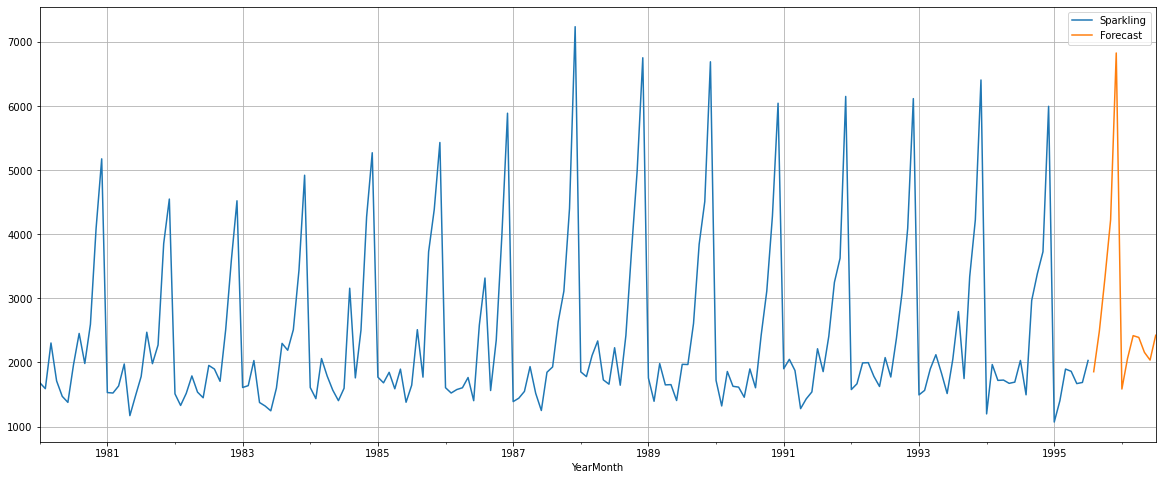

In [676]:
df.plot(legend  = True, label = 'Actual')
prediction_1.plot(legend = True, label = 'Forecast');
plt.grid()

#### Prediction Confidence Intervals : Margin of Error

One assumption that we will make over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [677]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level.Here we are taking the multiplier to be 1.96 since in a normal distribution( as the residual should be if you have done the modelling properly,), 95% of values lie within +/- 1.96 sigma of the mean

pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*fullmodel1.resid.std(),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*fullmodel1.resid.std()}).round(0)
pred_1_df.head()

lower_CI  prediction  upper_ci
1995-08-01    1027.0      1855.0    2683.0
1995-09-01    1659.0      2487.0    3315.0
1995-10-01    2496.0      3324.0    4152.0
1995-11-01    3399.0      4227.0    5055.0
1995-12-01    6004.0      6832.0    7660.0

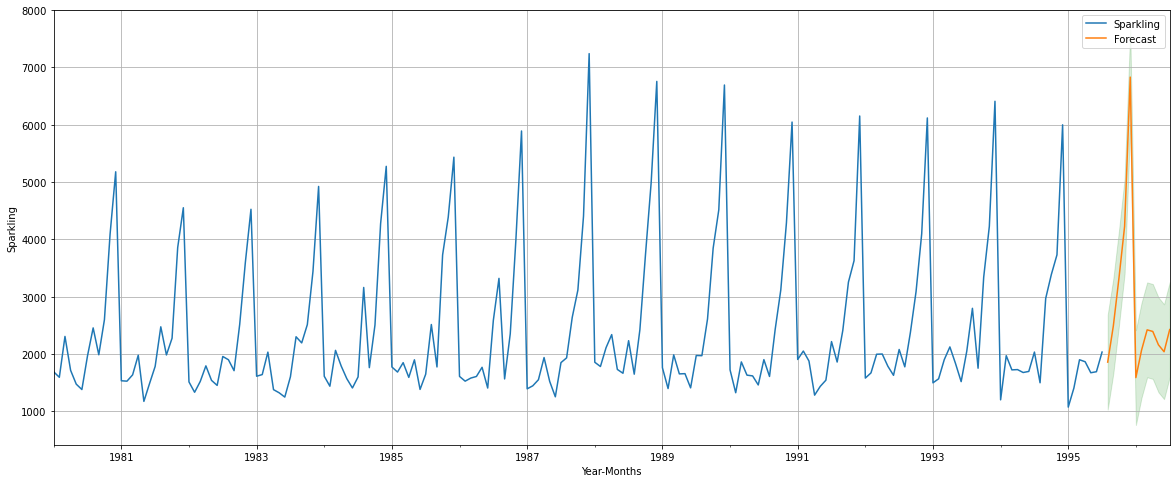

In [678]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual') # saving the plot axis to refer to it later for superimposing other plots or add layers to it

pred_1_df['prediction'].plot(ax=axis, 
                             label='Forecast', 
                             alpha=1) # alpha here is for transparency of the prediction line

# fill_between function shades a specified region in the plot. The region's bounds are specified as the x axis values and y axis values

axis.fill_between(pred_1_df.index, 
                  pred_1_df['lower_CI'], 
                  pred_1_df['upper_ci'], 
                  color='green', 
                  alpha=.15) # alpha here denotes the transparency of the shaded region

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();

# End of Problem 1

# Problem 2(Rose)

# 1- Read the data as an appropriate Time Series data and plot the data.

In [345]:
dfr = pd.read_csv('Rose.csv',parse_dates=True,index_col='YearMonth')
dfr.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [346]:
dfr.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [347]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

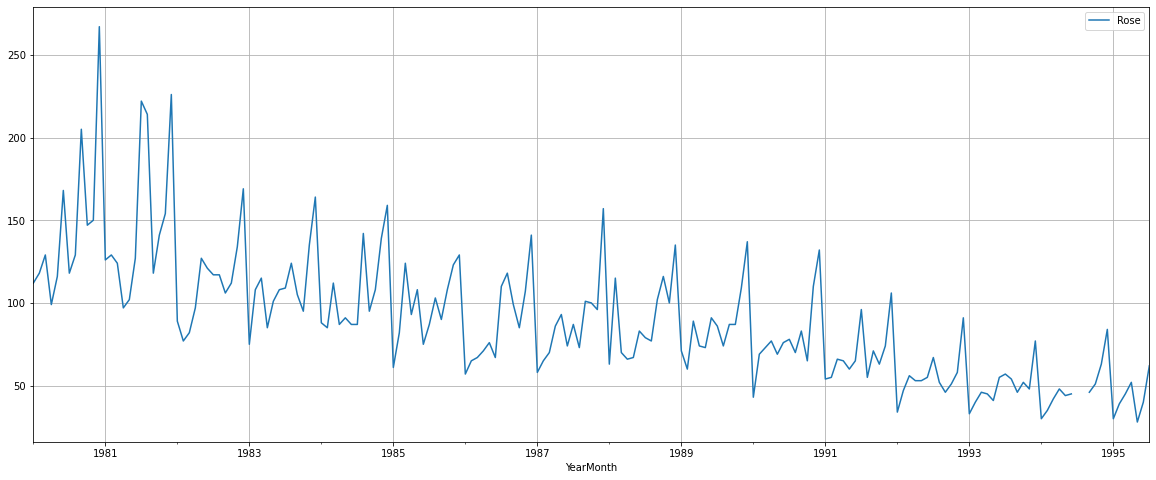

In [348]:
dfr.plot(grid=True);

# 2- Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [349]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [350]:
dfr.shape

(187, 1)

In [351]:
dfr.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

Checking the missing data

In [352]:
dfr.isna().sum()

Rose    2
dtype: int64

Imputing the missing data

In [353]:
dfr[dfr.isna()['Rose'] == True]

Rose
YearMonth       
1994-07-01   NaN
1994-08-01   NaN

In [354]:
dfr.interpolate(method='spline',order=2)['1994'].tail(10)

Rose
YearMonth           
1994-03-01  42.00000
1994-04-01  48.00000
1994-05-01  44.00000
1994-06-01  45.00000
1994-07-01  45.34978
1994-08-01  44.51237
1994-09-01  46.00000
1994-10-01  51.00000
1994-11-01  63.00000
1994-12-01  84.00000

In [355]:
dfr = dfr.interpolate(method='spline',order=2)

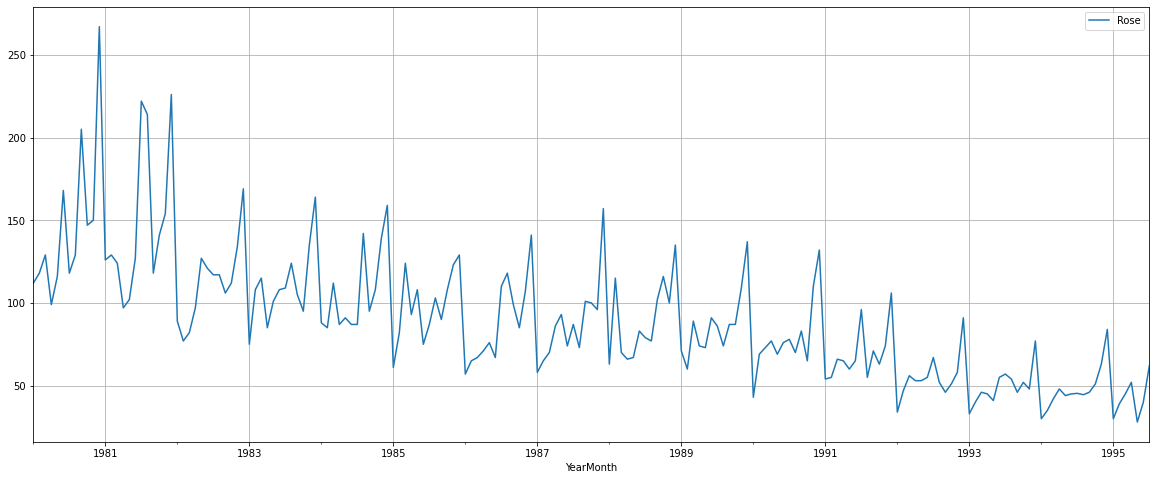

In [356]:
dfr.plot(grid=True);

### Plot an year on year Rose wine sale data

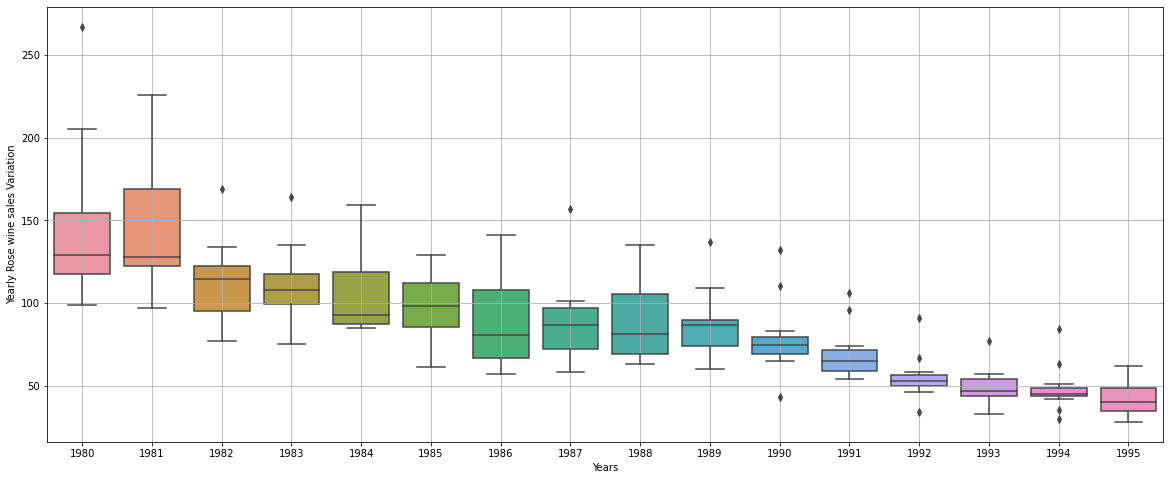

In [357]:
sns.boxplot(x=dfr.index.year, data=dfr,y=dfr['Rose'], whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Rose wine sales Variation');

### Plot a monthly boxplot for the wine sales taking all the years into account.

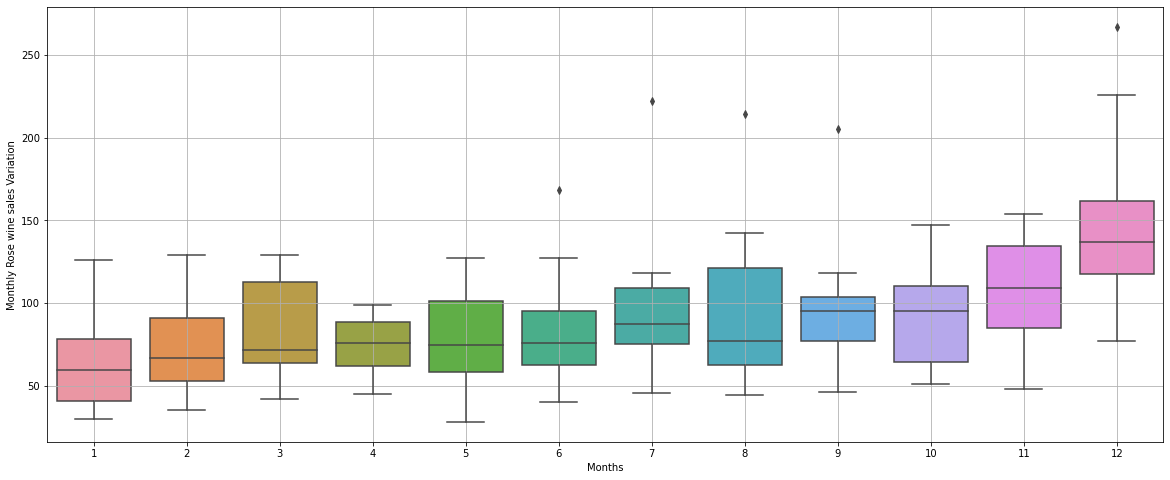

In [358]:
sns.boxplot(x=dfr.index.month, data=dfr, y=dfr['Rose'] ,whis=1.5)
plt.xlabel('Months');
plt.ylabel('Monthly Rose wine sales Variation');
plt.grid();

### Plot a monthplot of the given Time Series.

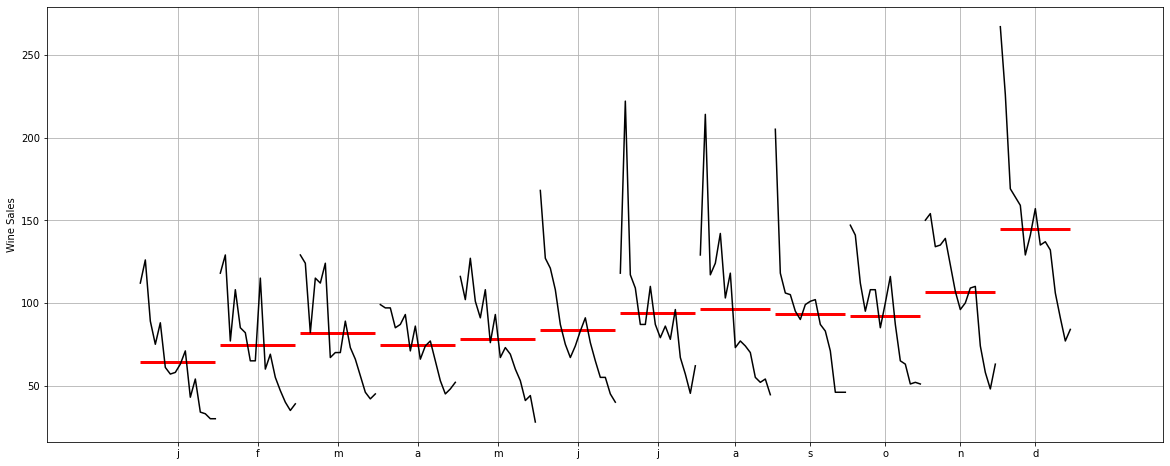

In [359]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(dfr,ylabel='Wine Sales')
plt.grid();

### Monthly time series

In [360]:
monthly_sales_across_years = pd.pivot_table(dfr, values = 'Rose', columns = dfr.index.month, index = dfr.index.year)
monthly_sales_across_years

YearMonth     1      2      3     4      5      6          7          8   \
YearMonth                                                                  
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.00000  129.00000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.00000  214.00000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.00000  117.00000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.00000  124.00000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.00000  142.00000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.00000  103.00000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.00000  118.00000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.00000   73.00000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.00000   77.00000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.00000   74.00000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.00000   70.00000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.00000   55.00000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.00000   52.00000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.00000   54.00000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.34978   44.51237   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.00000        NaN   

YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

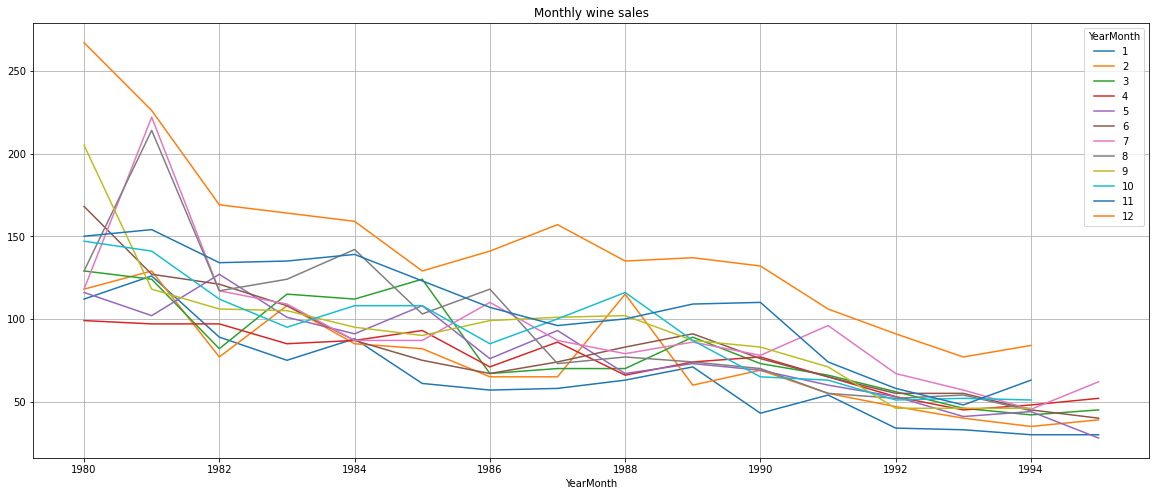

In [361]:
monthly_sales_across_years.plot(grid='True',title='Monthly wine sales');

### Yearly plot

In [362]:
df_yearly_sum = dfr.resample('A').sum()
df_yearly_sum.head()

Rose
YearMonth         
1980-12-31  1758.0
1981-12-31  1780.0
1982-12-31  1348.0
1983-12-31  1324.0
1984-12-31  1280.0

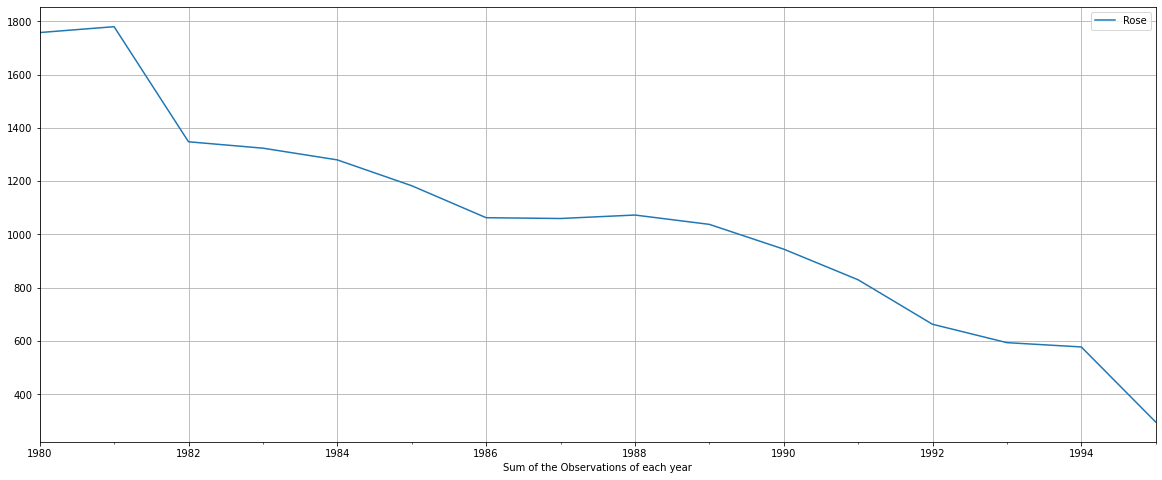

In [363]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [364]:
df_yearly_mean = dfr.resample('Y').mean()
df_yearly_mean.head()

Rose
YearMonth             
1980-12-31  146.500000
1981-12-31  148.333333
1982-12-31  112.333333
1983-12-31  110.333333
1984-12-31  106.666667

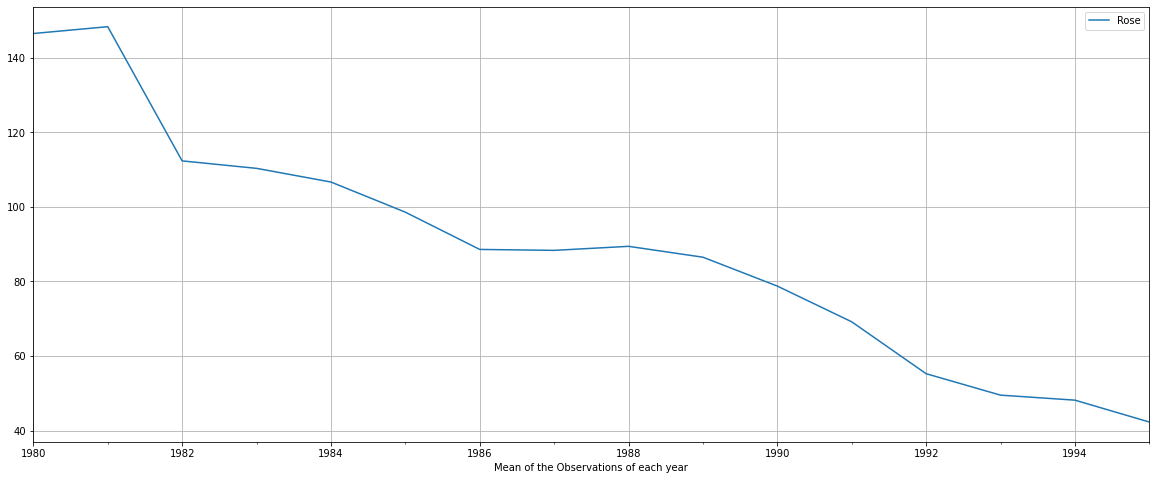

In [365]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

### Quarterly plot

In [366]:
df_quarterly_sum = dfr.resample('Q').sum()
df_quarterly_sum.head()

Rose
YearMonth        
1980-03-31  359.0
1980-06-30  383.0
1980-09-30  452.0
1980-12-31  564.0
1981-03-31  379.0

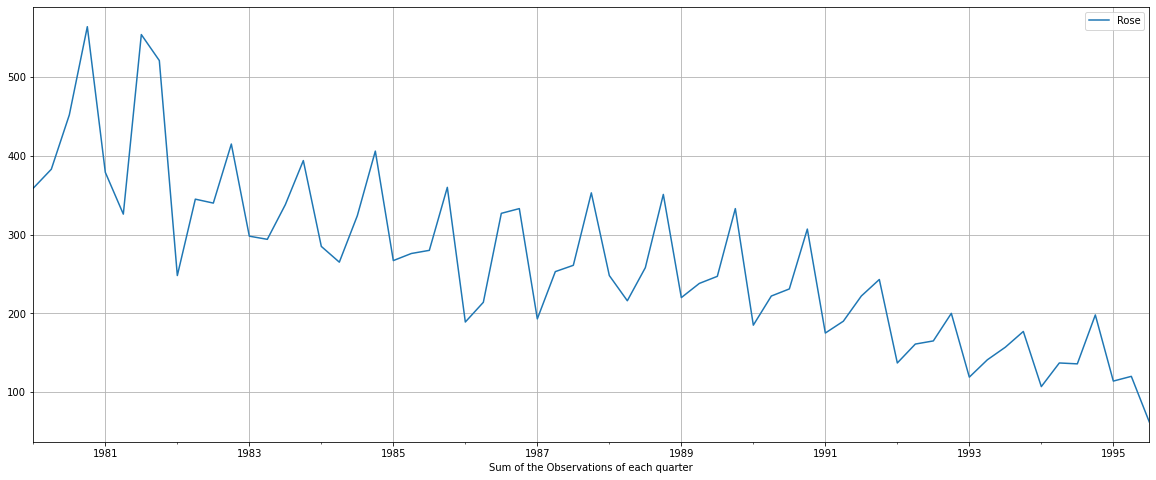

In [367]:
df_quarterly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each quarter');

In [368]:
df_quarterly_mean = dfr.resample('Q').mean()
df_quarterly_mean.head()

Rose
YearMonth             
1980-03-31  119.666667
1980-06-30  127.666667
1980-09-30  150.666667
1980-12-31  188.000000
1981-03-31  126.333333

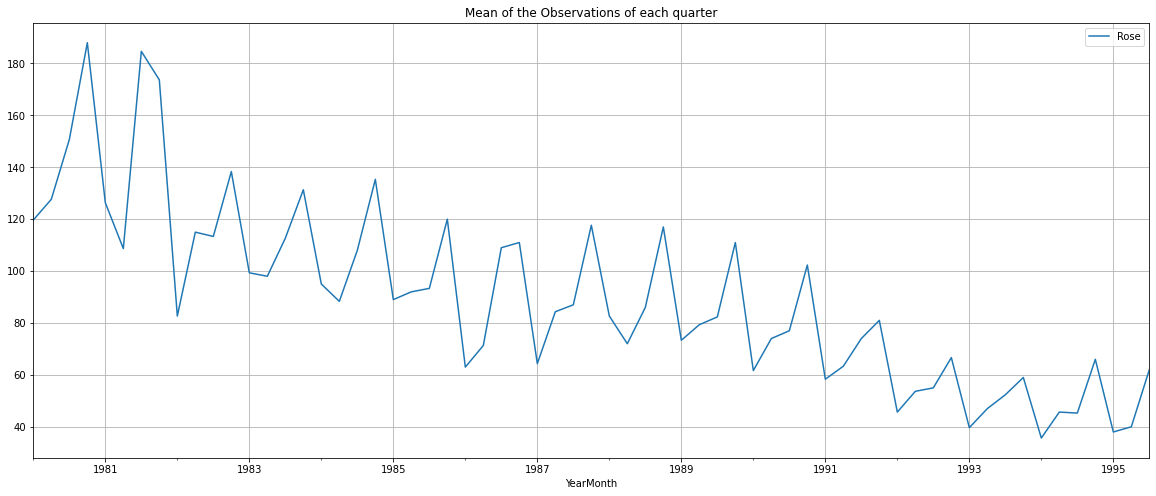

In [369]:
df_quarterly_mean.plot();
plt.grid()
plt.title('Mean of the Observations of each quarter');

### 5 yearly plot

In [370]:
df_decade_sum = dfr.resample('5Y').sum()
df_decade_sum

Rose
YearMonth              
1980-12-31  1758.000000
1985-12-31  6915.000000
1990-12-31  5179.000000
1995-12-31  2960.862151

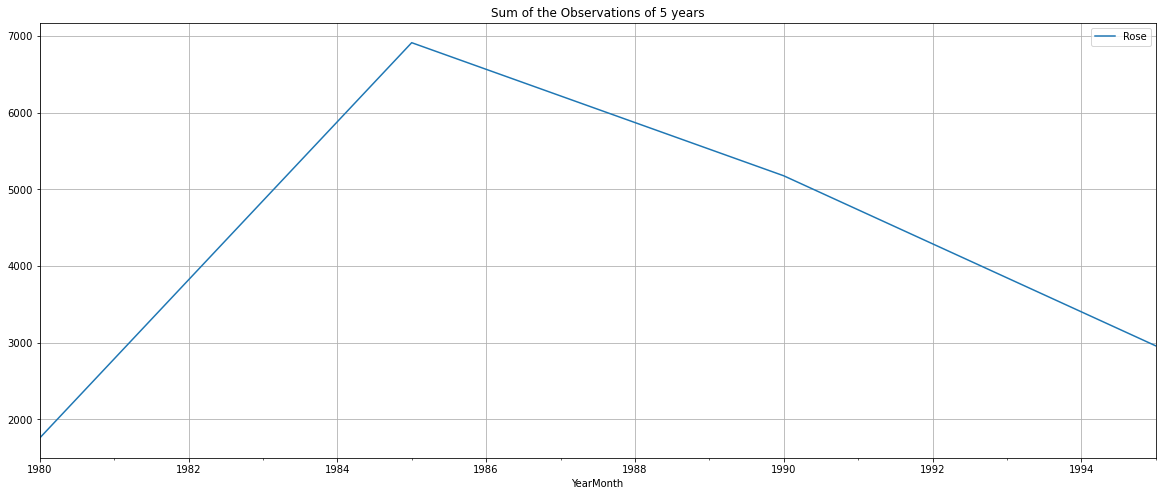

In [371]:
df_decade_sum.plot();
plt.grid()
plt.title('Sum of the Observations of 5 years');

### Decompose the series

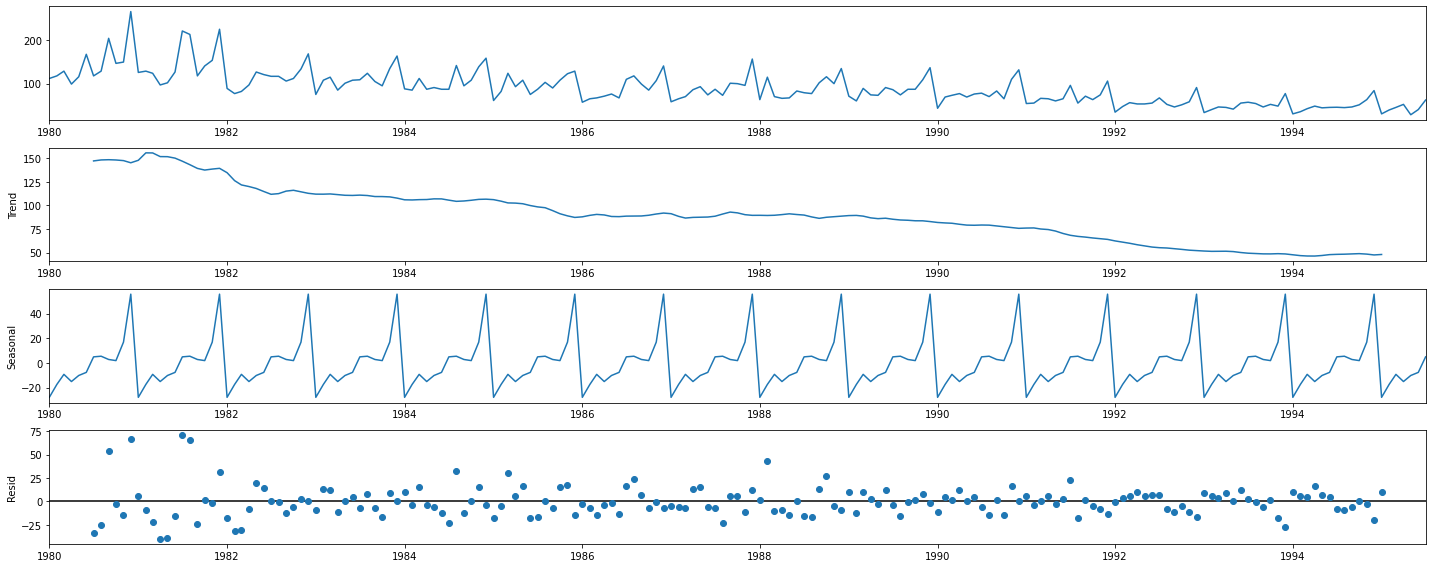

In [372]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dfr,model='additive')
decomposition.plot();

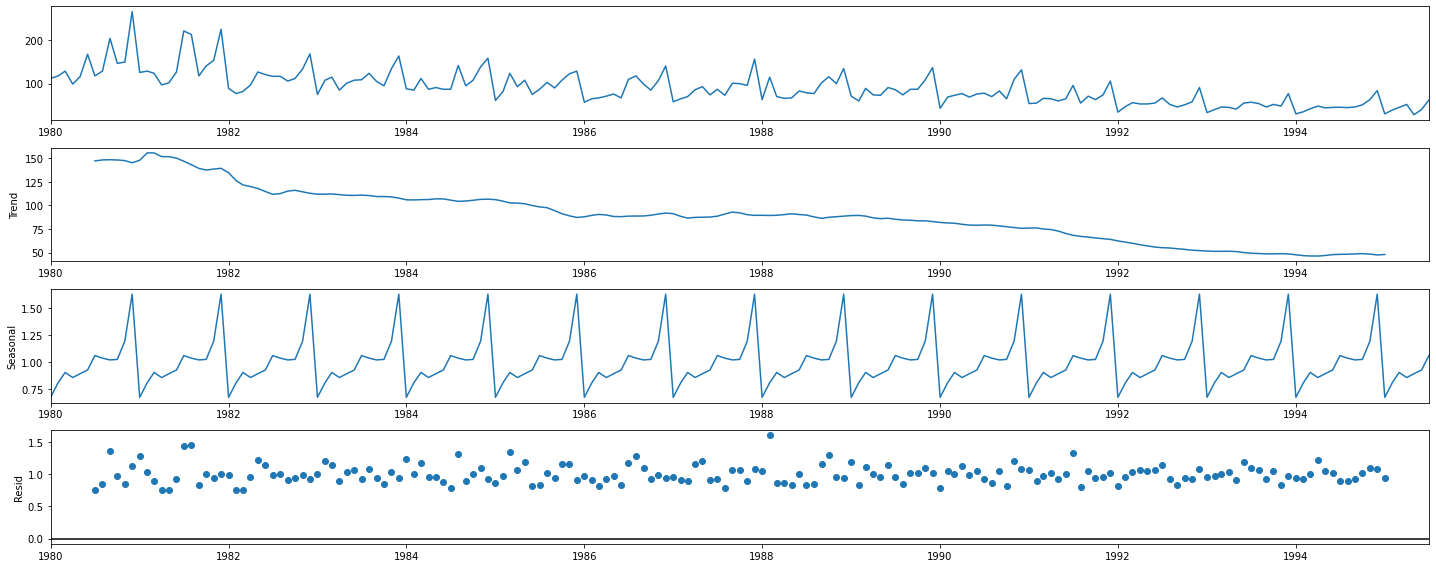

In [373]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dfr,model='multiplicative')
decomposition.plot();

In [374]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670192
1980-02-01    0.806215
1980-03-01    0.901294
1980-04-01    0.854174
1980-05-01    0.889548
1980-06-01    0.924116
1980-07-01    1.058182
1980-08-01    1.034409
1980-09-01    1.017769
1980-10-01    1.022706
1980-11-01    1.192516
1980-12-01    1.628878
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758155
1980-08-01    0.841916
1980-09-01    1.357513
1980-10-01    0.970645
1980-11-01    0.853258
1980-12-01    1.129485
Name: resid, dtype: fl

# 3- Split the data into training and test. The test data should start in 1991.

In [375]:
train = dfr[dfr.index.year<1991]
test = dfr[dfr.index.year>=1991]

In [376]:
train.shape, test.shape

((132, 1), (55, 1))

In [377]:
train.tail()

Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

In [378]:
test.head()

Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

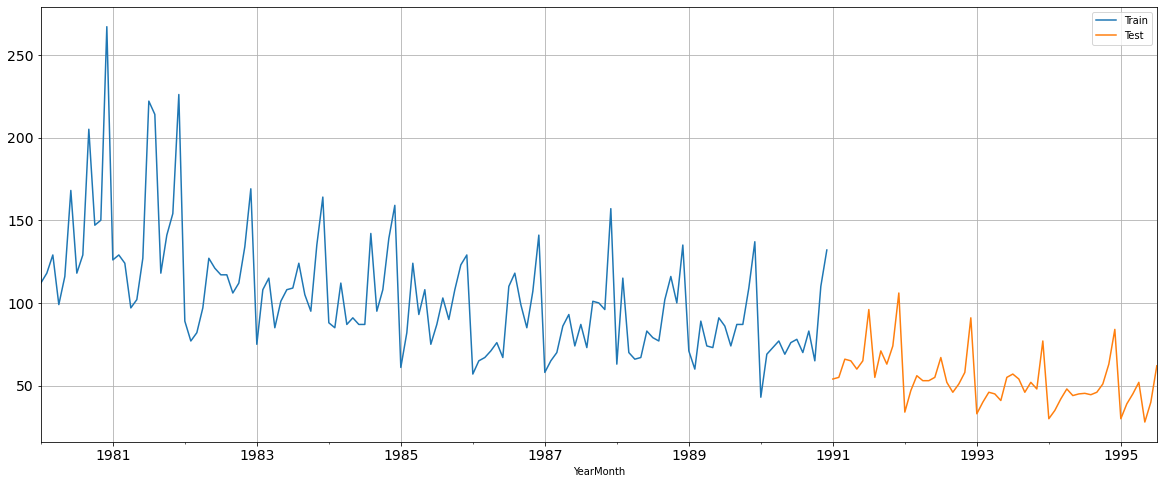

In [379]:
train['Rose'].plot(legend = True, label = 'Train', fontsize =14);
test['Rose'].plot(legend = True,label = 'Test', fontsize = 14);
plt.grid()

# 4- Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Linear Regression

In [380]:
train_time = [i+1 for i in range(len(train))] # 1 to 132
test_time = [i+133 for i in range(len(test))] # 133 to 187
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [381]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [382]:
print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

Last few rows of Training Data


Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132

First few rows of Test Data


Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137

Last few rows of Test Data


Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187

In [383]:
lr = LinearRegression()

In [384]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

In [385]:
test_predictions_model1= lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [386]:
LinearRegression_test.head(12)

Rose  time  RegOnTime
YearMonth                         
1991-01-01   54.0   133  72.063266
1991-02-01   55.0   134  71.568888
1991-03-01   66.0   135  71.074511
1991-04-01   65.0   136  70.580133
1991-05-01   60.0   137  70.085755
1991-06-01   65.0   138  69.591377
1991-07-01   96.0   139  69.096999
1991-08-01   55.0   140  68.602621
1991-09-01   71.0   141  68.108243
1991-10-01   63.0   142  67.613866
1991-11-01   74.0   143  67.119488
1991-12-01  106.0   144  66.625110

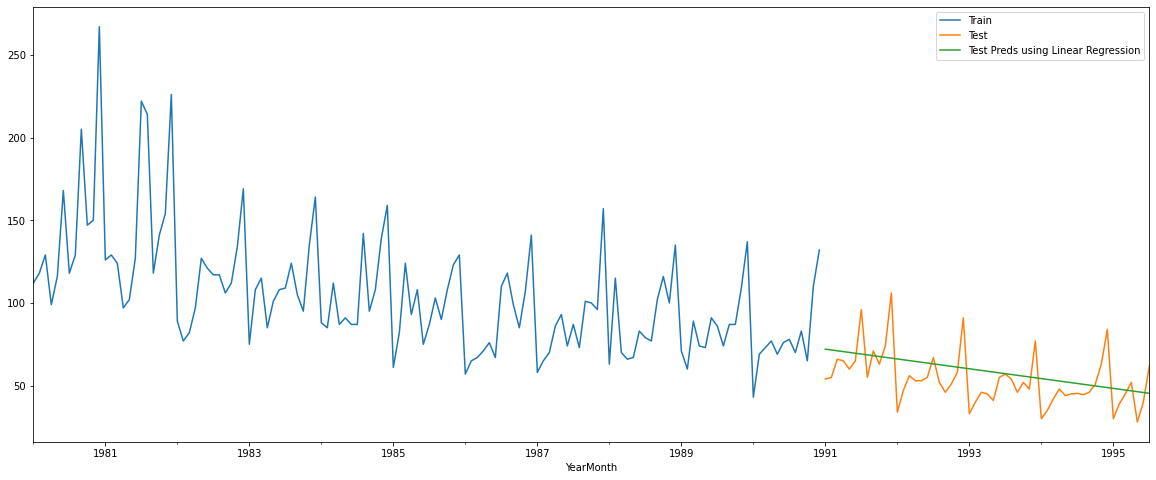

In [387]:
train['Rose'].plot(legend = True, label = 'Train')
test['Rose'].plot(legend = True, label = 'Test')
LinearRegression_test['RegOnTime'].plot(legend = True, 
                                        label = 'Test Preds using Linear Regression');

In [388]:
rmse_model1_test = mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.277 


In [389]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},
                         index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  15.276693

### Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [390]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [391]:
NaiveModel_test['naive'] = train['Rose'][len(train['Rose'])-1]

In [392]:
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

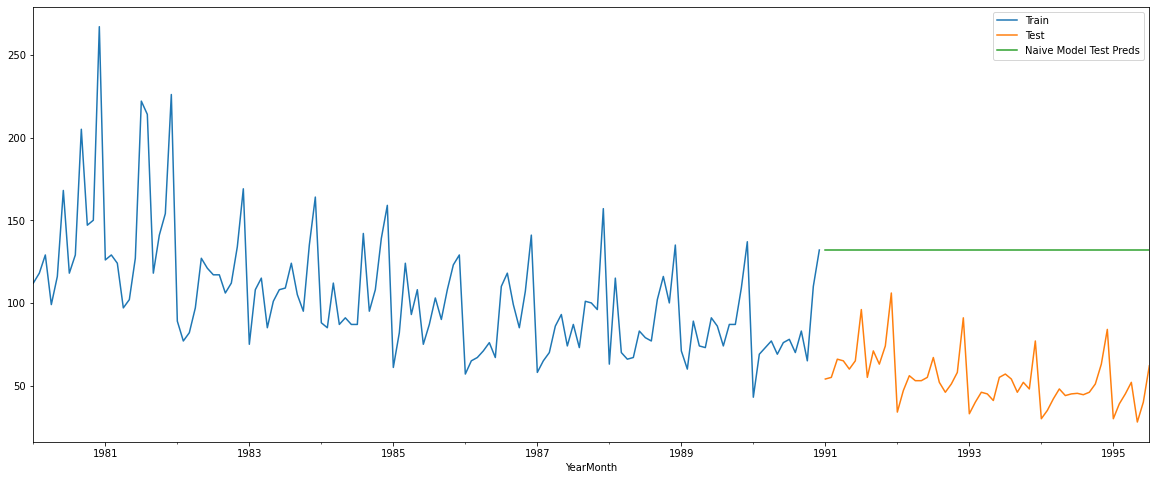

In [393]:
train['Rose'].plot(legend = True, label = 'Train')
test['Rose'].plot(legend = True, label = 'Test')
NaiveModel_test['naive'].plot(legend = True, label = 'Naive Model Test Preds');

In [394]:
rmse_model2_test = mean_squared_error(NaiveModel_test['Rose'],NaiveModel_test['naive'],squared=False)
print("For naive model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model2_test))

For naive model forecast on the Test Data,  RMSE is 79.741 


In [395]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  15.276693
NaiveModel        79.741326

### Method 3: Simple Average
For this particular simple average method, we will forecast by using the average of the training values.

In [396]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [397]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

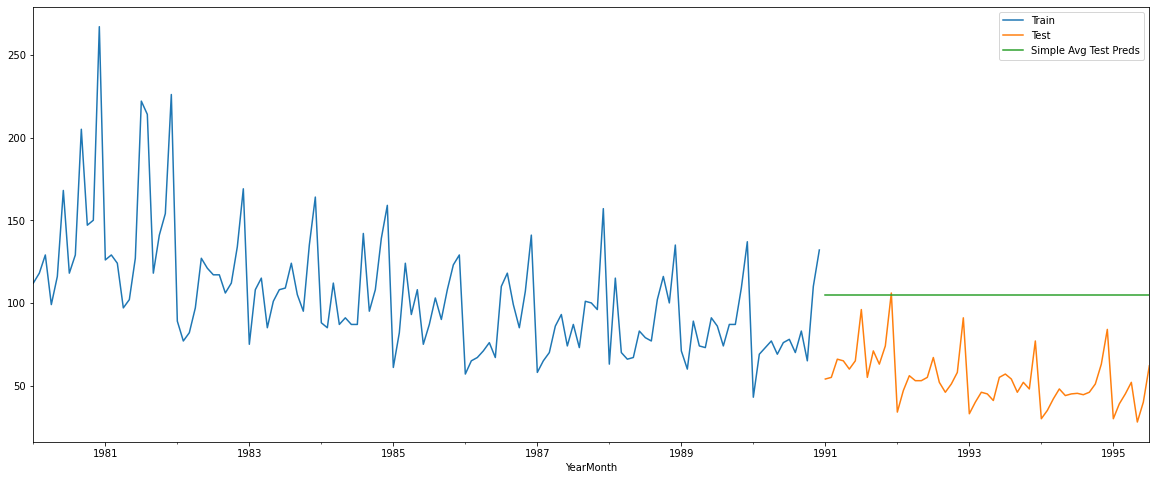

In [398]:
train['Rose'].plot(legend = True, label = 'Train')
test['Rose'].plot(legend = True, label = 'Test')
SimpleAverage_test['mean_forecast'].plot(legend=True,label= 'Simple Avg Test Preds');

In [399]:
rmse_model3_test = mean_squared_error(SimpleAverage_test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For simple average model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model3_test))

For simple average model forecast on the Test Data,  RMSE is 53.484 


In [400]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    15.276693
NaiveModel          79.741326
SimpleAverageModel  53.483727

### Method 4: Moving Average(MA)
For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [401]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [402]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head(10)

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0      114.50         NaN         NaN
1980-05-01  116.0       107.5      115.50         NaN         NaN
1980-06-01  168.0       142.0      128.00  123.666667         NaN
1980-07-01  118.0       143.0      125.25  124.666667         NaN
1980-08-01  129.0       123.5      132.75  126.500000         NaN
1980-09-01  205.0       167.0      155.00  139.166667  132.666667
1980-10-01  147.0       176.0      149.75  147.166667  136.555556

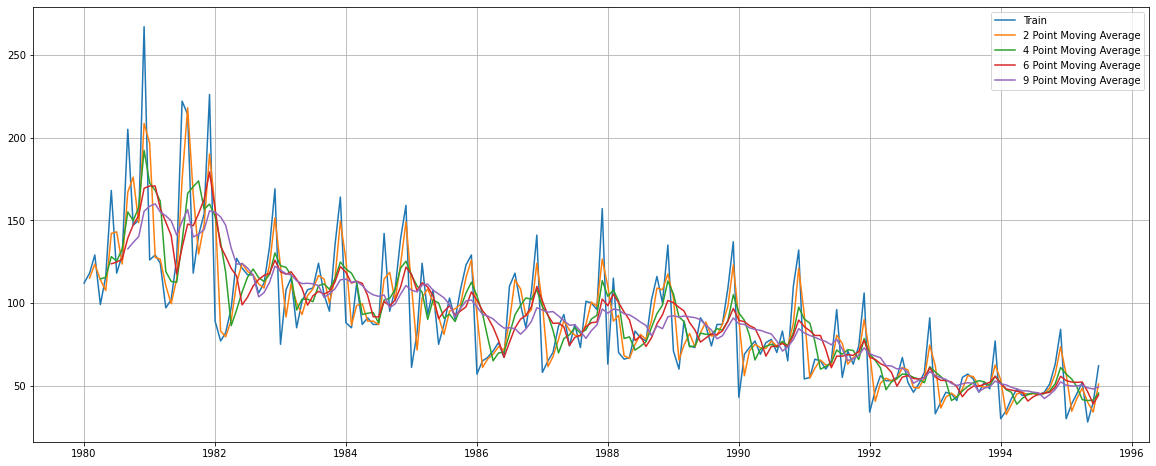

In [403]:
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

In [404]:
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year<1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year>=1991]

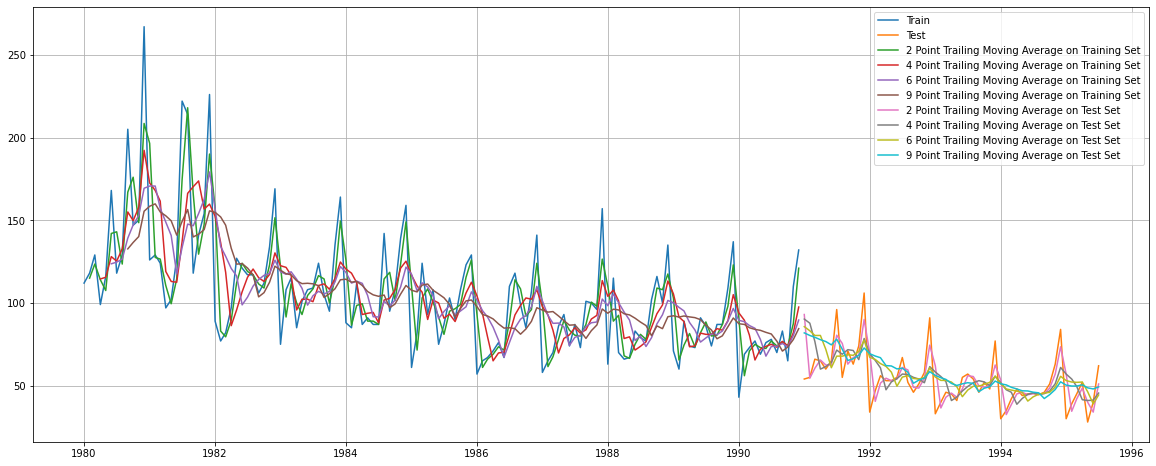

In [405]:
# Plotting on both the Training and Test data
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [406]:
## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = mean_squared_error(trailing_MovingAverage_test['Rose'],
                          trailing_MovingAverage_test['Trailing_2'],squared=False)
rmse_model4_test_2

11.529810501443771

In [407]:
## Test Data - RMSE --> 4 point Trailing MA
rmse_model4_test_4 = mean_squared_error(trailing_MovingAverage_test['Rose'],
                          trailing_MovingAverage_test['Trailing_4'],squared=False)
rmse_model4_test_4

14.457114917921

In [408]:
## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = mean_squared_error(trailing_MovingAverage_test['Rose'],
                          trailing_MovingAverage_test['Trailing_6'],squared=False)
rmse_model4_test_6

14.57178908926521

In [409]:
## Test Data - RMSE --> 9 point Trailing MA
rmse_model4_test_9 = mean_squared_error(trailing_MovingAverage_test['Rose'],
                          trailing_MovingAverage_test['Trailing_9'],squared=False)
rmse_model4_test_9

14.7319142818999

In [410]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2, rmse_model4_test_4,rmse_model4_test_6, rmse_model4_test_9]}, index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

In [411]:
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             15.276693
NaiveModel                   79.741326
SimpleAverageModel           53.483727
2pointTrailingMovingAverage  11.529811
4pointTrailingMovingAverage  14.457115
6pointTrailingMovingAverage  14.571789
9pointTrailingMovingAverage  14.731914

Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

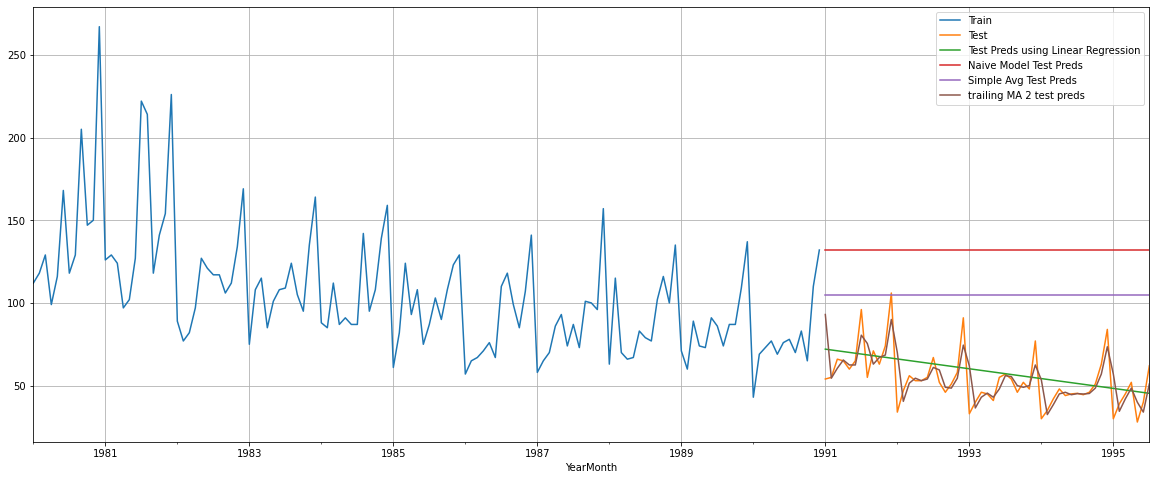

In [412]:
train['Rose'].plot(legend = True, label = 'Train')

test['Rose'].plot(legend = True, label = 'Test')

LinearRegression_test['RegOnTime'].plot(legend = True, label = 'Test Preds using Linear Regression')

NaiveModel_test['naive'].plot(legend = True, label = 'Naive Model Test Preds')

SimpleAverage_test['mean_forecast'].plot(legend=True,
                                         label= 'Simple Avg Test Preds')

trailing_MovingAverage_test['Trailing_2'].plot(legend=True,
                                              label ='trailing MA 2 test preds');
plt.grid()

### Method 5: Simple Exponential Smoothing

In [413]:
SES_train = train.copy()
SES_test = test.copy()
model_SES = SimpleExpSmoothing(SES_train['Rose'],initialization_method='estimated')

In [414]:
model_SES_autofit = model_SES.fit()

In [415]:
model_SES_autofit.params

{'smoothing_level': 0.09874963957110783,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38708961485827,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [416]:
model_SES_autofit.params_formatted

name      param  optimized
smoothing_level  alpha    0.09875       True
initial_level      l.0  134.38709       True

In [417]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test)).round(0)
SES_test.head()

Rose  predict
YearMonth                
1991-01-01  54.0     87.0
1991-02-01  55.0     87.0
1991-03-01  66.0     87.0
1991-04-01  65.0     87.0
1991-05-01  60.0     87.0

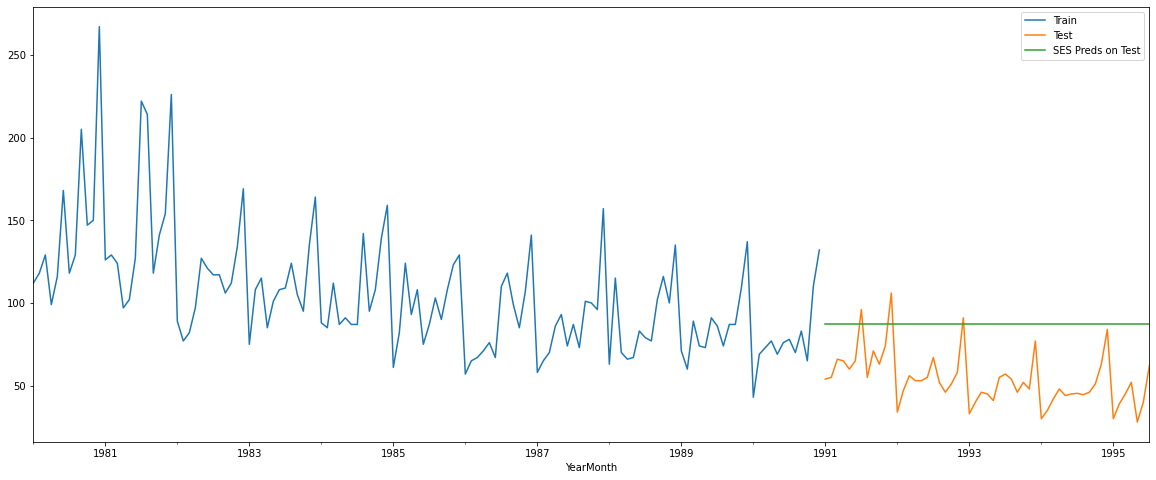

In [418]:
SES_train['Rose'].plot(legend=True, label = 'Train')
SES_test['Rose'].plot(legend=True, label = 'Test')
SES_test['predict'].plot(legend=True, label = 'SES Preds on Test');

In [419]:
rmse_model5_test_1 = mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For simple exponential smoothing on the Test Data,  RMSE is %3.3f " %(rmse_model5_test_1))

For simple exponential smoothing on the Test Data,  RMSE is 36.725 


In [420]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.0987,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                         15.276693
NaiveModel                               79.741326
SimpleAverageModel                       53.483727
2pointTrailingMovingAverage              11.529811
4pointTrailingMovingAverage              14.457115
6pointTrailingMovingAverage              14.571789
9pointTrailingMovingAverage              14.731914
Alpha=0.0987,SimpleExponentialSmoothing  36.725007

### Method 6: Double Exponential Smoothing (Holt's Model)
Two parameters 𝛼 and 𝛽 are estimated in this model. Level and Trend are accounted for in this model.

In [421]:
DES_train = train.copy()
DES_test = test.copy()

In [422]:
model_DES = Holt(DES_train['Rose'],initialization_method='estimated')

In [423]:
model_DES_autofit = model_DES.fit()

In [424]:
model_DES_autofit.params

{'smoothing_level': 1.4901247095597348e-08,
 'smoothing_trend': 7.3896641488640725e-09,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81551313502814,
 'initial_trend': -0.4943777717865305,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [425]:
model_DES_autofit.params_formatted

name         param  optimized
smoothing_level  alpha  1.490125e-08       True
smoothing_trend   beta  7.389664e-09       True
initial_level      l.0  1.378155e+02       True
initial_trend      b.0 -4.943778e-01       True

In [426]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test)).round(0)
DES_test.head()

Rose  predict
YearMonth                
1991-01-01  54.0     72.0
1991-02-01  55.0     72.0
1991-03-01  66.0     71.0
1991-04-01  65.0     71.0
1991-05-01  60.0     70.0

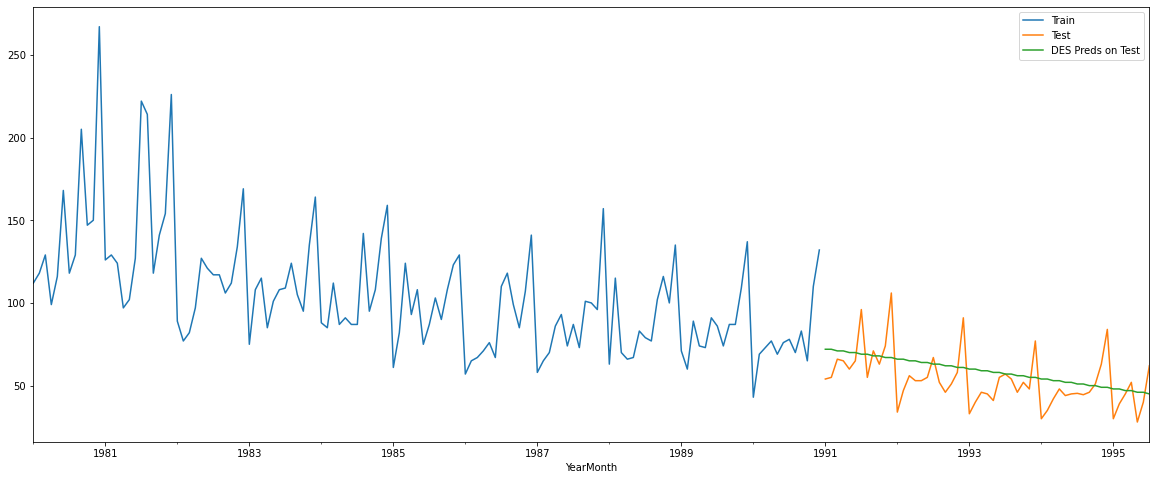

In [427]:
DES_train['Rose'].plot(legend=True, label = 'Train')
DES_test['Rose'].plot(legend=True, label = 'Test')
DES_test['predict'].plot(legend=True, label = 'DES Preds on Test');

In [428]:
rmse_model6_test_1 = mean_squared_error(DES_test['Rose'],DES_test['predict'],squared=False)
print("For double exponential smoothing on the Test Data,  RMSE is %3.3f " %(rmse_model6_test_1))

For double exponential smoothing on the Test Data,  RMSE is 15.258 


In [429]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]},index=['Alpha=0,Beta=0,DoubleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE
RegressionOnTime                           15.276693
NaiveModel                                 79.741326
SimpleAverageModel                         53.483727
2pointTrailingMovingAverage                11.529811
4pointTrailingMovingAverage                14.457115
6pointTrailingMovingAverage                14.571789
9pointTrailingMovingAverage                14.731914
Alpha=0.0987,SimpleExponentialSmoothing    36.725007
Alpha=0,Beta=0,DoubleExponentialSmoothing  15.257793

### Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [430]:
TES_train = train.copy()
TES_test = test.copy()

In [431]:
model_TES = ExponentialSmoothing(TES_train['Rose'],
                                 trend='additive',
                                 seasonal='multiplicative',initialization_method='estimated')

In [432]:
model_TES_autofit = model_TES.fit()

In [433]:
model_TES_autofit.params

{'smoothing_level': 0.07130285749243212,
 'smoothing_trend': 0.04550837652110988,
 'smoothing_seasonal': 8.385716703273524e-05,
 'damping_trend': nan,
 'initial_level': 163.60092654560762,
 'initial_trend': -0.9804841883026134,
 'initial_seasons': array([0.68714163, 0.77936108, 0.85184662, 0.74446365, 0.8372947 ,
        0.91182237, 1.00282327, 1.06745268, 1.01025249, 0.98957378,
        1.1535151 , 1.59037115]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [434]:
model_TES_autofit.params_formatted

name       param  optimized
smoothing_level     alpha    0.071303       True
smoothing_trend      beta    0.045508       True
smoothing_seasonal  gamma    0.000084       True
initial_level         l.0  163.600927       True
initial_trend         b.0   -0.980484       True
initial_seasons.0     s.0    0.687142       True
initial_seasons.1     s.1    0.779361       True
initial_seasons.2     s.2    0.851847       True
initial_seasons.3     s.3    0.744464       True
initial_seasons.4     s.4    0.837295       True
initial_seasons.5     s.5    0.911822       True
initial_seasons.6     s.6    1.002823       True
initial_seasons.7     s.7    1.067453       True
initial_seasons.8     s.8    1.010252       True
initial_seasons.9     s.9    0.989574       True
initial_seasons.10   s.10    1.153515       True
initial_seasons.11   s.11    1.590371       True

In [435]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test)).round(0)
TES_test.head()

Rose  auto_predict
YearMonth                     
1991-01-01  54.0          56.0
1991-02-01  55.0          64.0
1991-03-01  66.0          69.0
1991-04-01  65.0          60.0
1991-05-01  60.0          68.0

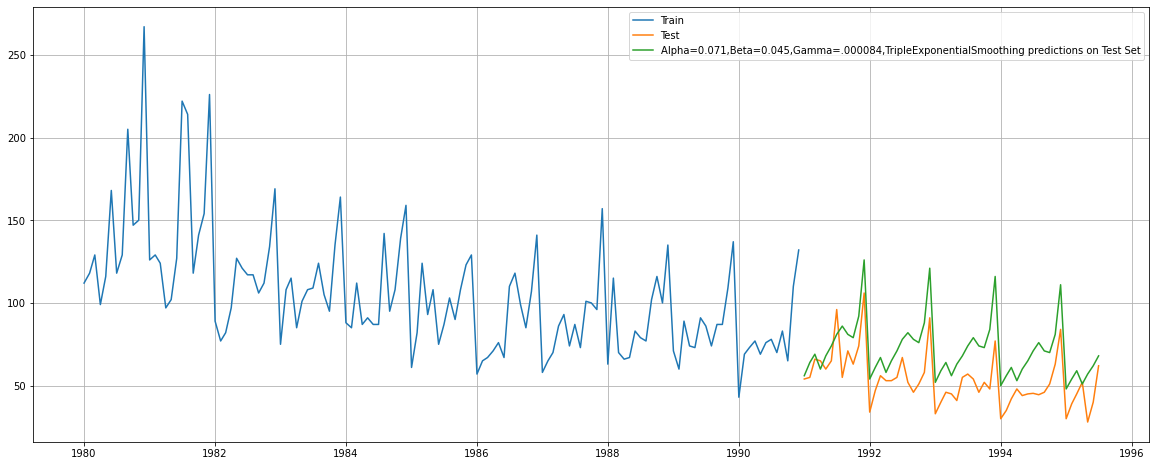

In [436]:
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.071,Beta=0.045,Gamma=.000084,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [437]:
rmse_model7_test_1 = mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For triple exponential smoothing on the Test Data,  RMSE is %3.3f " %(rmse_model7_test_1))

For triple exponential smoothing on the Test Data,  RMSE is 20.269 


In [438]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]}
                           ,index=['Alpha=0.071,Beta=0.045,Gamma=.000084,TripleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf.round(0)

Test RMSE
RegressionOnTime                                         15.0
NaiveModel                                               80.0
SimpleAverageModel                                       53.0
2pointTrailingMovingAverage                              12.0
4pointTrailingMovingAverage                              14.0
6pointTrailingMovingAverage                              15.0
9pointTrailingMovingAverage                              15.0
Alpha=0.0987,SimpleExponentialSmoothing                  37.0
Alpha=0,Beta=0,DoubleExponentialSmoothing                15.0
Alpha=0.071,Beta=0.045,Gamma=.000084,TripleExpo...       20.0

#### Identifying Optimum Values of  𝛼 ,  𝛽  and  𝛾

In [439]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [440]:
alpha_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
beta_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
gamma_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [441]:
from statsmodels.tools.eval_measures import rmse

In [442]:
for i in alpha_list:
    for j in beta_list:
        for k in gamma_list:
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,
                                                  smoothing_trend=j,
                                                  smoothing_seasonal=k)
            
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test))
        
            rmse_model8_train = rmse(TES_train['Rose'],
                                     TES_train['predict',i,j,k])
            
            rmse_model8_test = rmse(TES_test['Rose'],
                                    TES_test['predict',i,j,k])
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,
                                                  'Beta Values':j,
                                                  'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,
                                                  'Test RMSE':rmse_model8_test},ignore_index=True)

In [443]:
TES_test.head().round(0)

Rose  auto_predict  (predict, 0.3, 0.3, 0.3)  \
YearMonth                                                  
1991-01-01  54.0          56.0                      49.0   
1991-02-01  55.0          64.0                      65.0   
1991-03-01  66.0          69.0                      69.0   
1991-04-01  65.0          60.0                      66.0   
1991-05-01  60.0          68.0                      64.0   

            (predict, 0.3, 0.3, 0.4)  (predict, 0.3, 0.3, 0.5)  \
YearMonth                                                        
1991-01-01                      47.0                      45.0   
1991-02-01                      63.0                      61.0   
1991-03-01                      66.0                      63.0   
1991-04-01                      63.0                      58.0   
1991-05-01                      59.0                      52.0   

            (predict, 0.3, 0.3, 0.6)  (predict, 0.3, 0.3, 0.7)  \
YearMonth                                                        
1991-01-01                      43.0                      45.0   
1991-02-01                      60.0                      65.0   
1991-03-01                      59.0                      60.0   
1991-04-01                      53.0                      52.0   
1991-05-01                      43.0                      38.0   

            (predict, 0.3, 0.3, 0.8)  (predict, 0.3, 0.3, 0.9)  \
YearMonth                                                        
1991-01-01                      48.0                      48.0   
1991-02-01                      76.0                      84.0   
1991-03-01                      73.0                      80.0   
1991-04-01                      69.0                      83.0   
1991-05-01                      49.0                      60.0   

            (predict, 0.3, 0.3, 1.0)  ...  (predict, 1.0, 0.9, 0.9)  \
YearMonth                             ...                             
1991-01-01                      46.0  ...                     520.0   
1991-02-01                      87.0  ...                    -279.0   
1991-03-01                      78.0  ...                     631.0   
1991-04-01                      90.0  ...                     -37.0   
1991-05-01                      68.0  ...                    -499.0   

            (predict, 1.0, 0.9, 1.0)  (predict, 1.0, 1.0, 0.3)  \
YearMonth                                                        
1991-01-01                    -190.0                    -848.0   
1991-02-01                     469.0                    -140.0   
1991-03-01                    -224.0                      39.0   
1991-04-01                   10543.0                     147.0   
1991-05-01                      37.0                     531.0   

            (predict, 1.0, 1.0, 0.4)  (predict, 1.0, 1.0, 0.5)  \
YearMonth                                                        
1991-01-01                    -502.0                   -4111.0   
1991-02-01                    -887.0                   27816.0   
1991-03-01                   -1171.0                   14047.0   
1991-04-01                     -27.0                    3182.0   
1991-05-01                    1658.0                     317.0   

            (predict, 1.0, 1.0, 0.6)  (predict, 1.0, 1.0, 0.7)  \
YearMonth                                                        
1991-01-01                      88.0                    -819.0   
1991-02-01                      93.0                     289.0   
1991-03-01                    -165.0                     468.0   
1991-04-01                    -862.0                    2799.0   
1991-05-01                    -157.0                     720.0   

            (predict, 1.0, 1.0, 0.8)  (predict, 1.0, 1.0, 0.9)  \
YearMonth                                                        
1991-01-01                      -0.0                     -46.0   
1991-02-01                     -45.0                     162.0   
1991-03-01                      -6.0               

In [444]:
resultsDf_8_2.round(1)

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
0             0.3          0.3           0.3        23.0       20.8
1             0.3          0.3           0.4        24.2       10.2
2             0.3          0.3           0.5        25.7       31.6
3             0.3          0.3           0.6        27.5       73.3
4             0.3          0.3           0.7        28.8      117.8
..            ...          ...           ...         ...        ...
507           1.0          1.0           0.6      2140.6     6630.7
508           1.0          1.0           0.7      3091.0     9721.2
509           1.0          1.0           0.8      2438.2     2573.8
510           1.0          1.0           0.9     28835.8     3522.9
511           1.0          1.0           1.0      1577.9     3104.7

[512 rows x 5 columns]

In [445]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
1            0.3          0.3           0.4   24.209084  10.157722
17           0.3          0.5           0.4   25.873405  10.363735
35           0.3          0.7           0.6   30.221082  10.744276
26           0.3          0.6           0.5   28.141788  10.759662
84           0.4          0.5           0.7   31.193940  13.361140

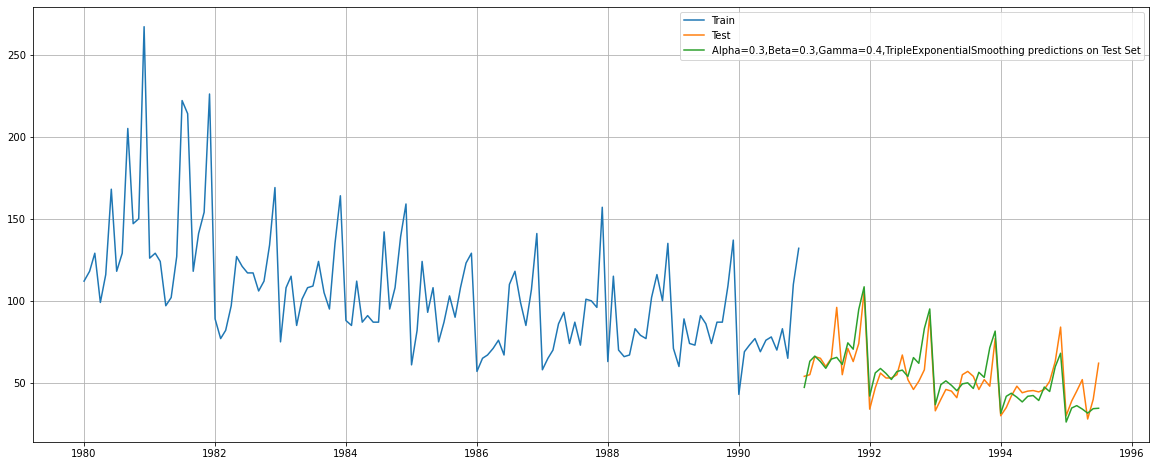

In [446]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.3, 0.4], label='Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [447]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf.round(0)

Test RMSE
RegressionOnTime                                         15.0
NaiveModel                                               80.0
SimpleAverageModel                                       53.0
2pointTrailingMovingAverage                              12.0
4pointTrailingMovingAverage                              14.0
6pointTrailingMovingAverage                              15.0
9pointTrailingMovingAverage                              15.0
Alpha=0.0987,SimpleExponentialSmoothing                  37.0
Alpha=0,Beta=0,DoubleExponentialSmoothing                15.0
Alpha=0.071,Beta=0.045,Gamma=.000084,TripleExpo...       20.0
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...       10.0

# 5- Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.

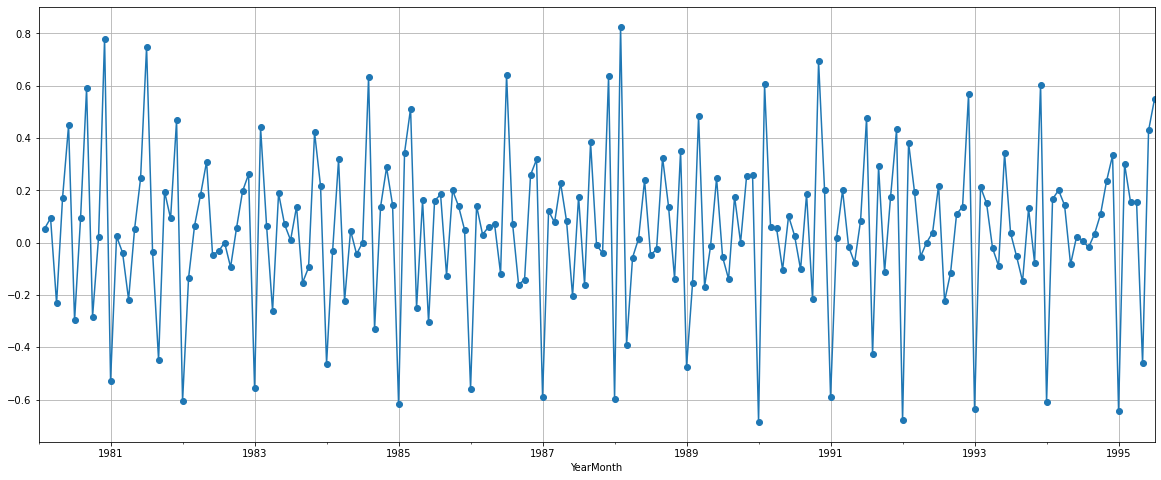

In [448]:
# Ploting month on month percentage sale
pct_change = dfr["Rose"].pct_change()
pct_change.plot(marker='o');
plt.grid()

### Check for stationarity of the whole Time Series data.
The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

𝐻0 : The Time Series has a unit root and is thus non-stationary.
<br>𝐻1 : The Time Series does not have a unit root and is thus stationary.
<br>We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the 𝛼 value.

In [449]:
dftest = adfuller(dfr,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.242
DF test p-value is 0.4664371020473041
Number of lags used 13


We see that at 5% significant level the Time Series is non-stationary as at high p-value we are unable to reject the null hypothesis.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

In [450]:
dfr['Rose'].diff()

YearMonth
1980-01-01     NaN
1980-02-01     6.0
1980-03-01    11.0
1980-04-01   -30.0
1980-05-01    17.0
              ... 
1995-03-01     6.0
1995-04-01     7.0
1995-05-01   -24.0
1995-06-01    12.0
1995-07-01    22.0
Name: Rose, Length: 187, dtype: float64

In [451]:
adfuller(dfr['Rose'].diff().dropna())[1] # d -->1

1.8136150586907003e-12

We see that at 𝛼 = 0.05 the Time Series is indeed stationary as the p-value is lower than 0.05 and hence we can reject the null hypothesis which says that the time series is not stationary. So differentiation by 1 makes the time series stationary.

### Check for stationarity of the training part of Time Series data.

In [452]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047072
Number of lags used 13


For training set also the p-value is more than 0.05 so we failed to reject the NULL hypothesis means train data is non stationary

Lets apply differencing by 1

In [453]:
adfuller(train['Rose'].diff().dropna())[1] # d -->1

7.061943750943704e-09

The p-Value is less than 0.05 means we reject the NULL hypothesis andifferentiation by 1 makes training data time series stationary

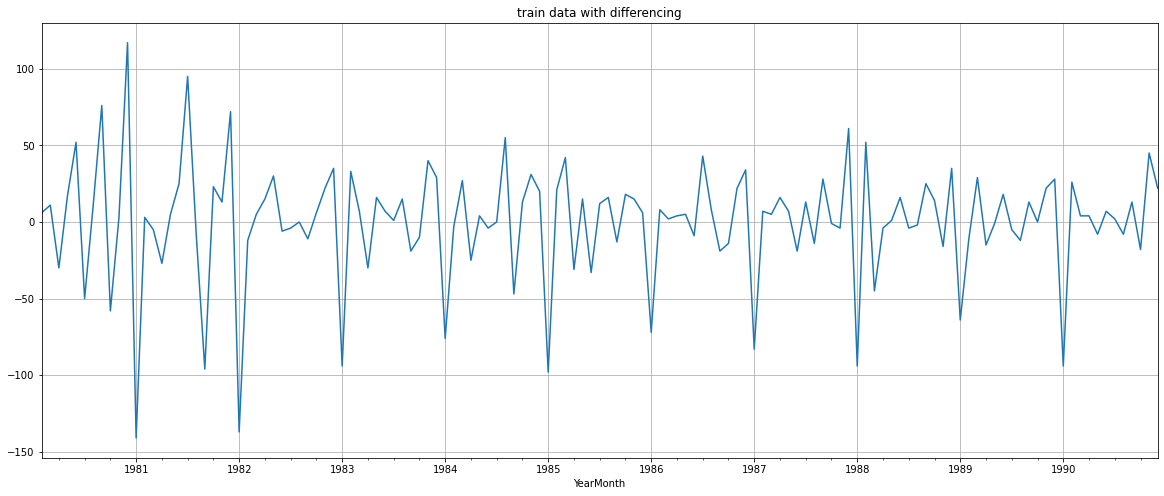

In [454]:
train['Rose'].diff().dropna().plot(grid=True,title='train data with differencing');

# 6- Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### ARIMA model

In [455]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [456]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [457]:
for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748299
ARIMA(0, 1, 2) - AIC:1279.6715288535793
ARIMA(0, 1, 3) - AIC:1280.5453761734657
ARIMA(1, 1, 0) - AIC:1317.3503105381546
ARIMA(1, 1, 1) - AIC:1280.5742295380073
ARIMA(1, 1, 2) - AIC:1279.8707234231906
ARIMA(1, 1, 3) - AIC:1281.8707223309966
ARIMA(2, 1, 0) - AIC:1298.6110341604983
ARIMA(2, 1, 1) - AIC:1281.507862186851
ARIMA(2, 1, 2) - AIC:1281.8707222264593
ARIMA(2, 1, 3) - AIC:1274.6948122121792
ARIMA(3, 1, 0) - AIC:1297.4810917271661
ARIMA(3, 1, 1) - AIC:1282.4192776271907
ARIMA(3, 1, 2) - AIC:1283.720740597711
ARIMA(3, 1, 3) - AIC:1278.6579946366096


In [458]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
11  (2, 1, 3)  1274.694812
15  (3, 1, 3)  1278.657995
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376

In [459]:
auto_ARIMA = ARIMA(train, order=(2,1,3))
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.347
Date:                Sun, 06 Feb 2022   AIC                           1274.695
Time:                        00:06:30   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6780      0.084    -20.035      0.000      -1.842      -1.514
ar.L2         -0.7288      0.084     -8.702      0.000      -0.893      -0.565
ma.L1          1.0447      0.670      1.559      0.1

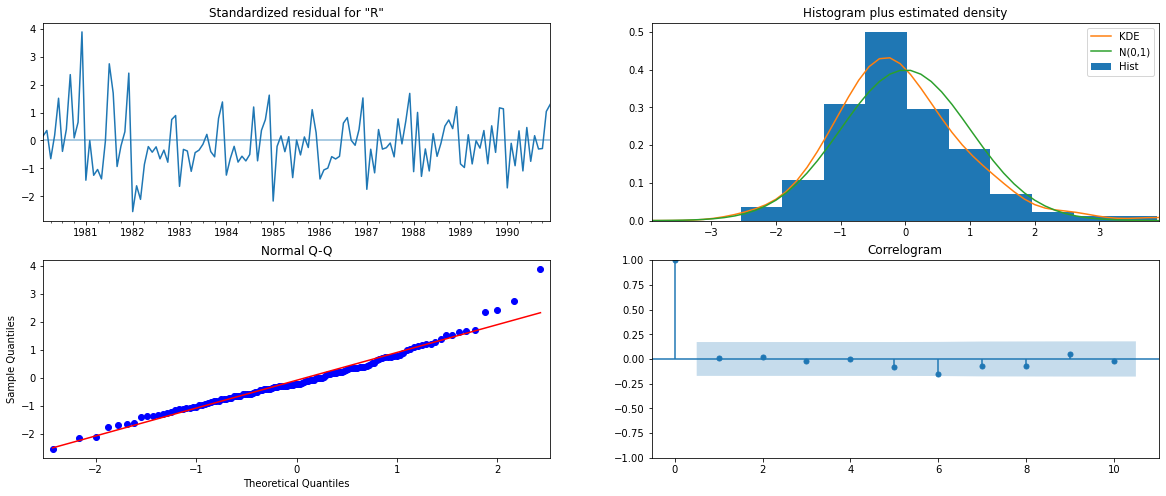

In [460]:
results_auto_ARIMA.plot_diagnostics();

Predict on test set using this model

In [461]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [462]:
ARIMA_rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print("For ARIMA on the Test Data,  RMSE is %3.3f " %(ARIMA_rmse))

For ARIMA on the Test Data,  RMSE is 36.835 


In [463]:
resultsDf_ARIMA = pd.DataFrame({'Test RMSE': [ARIMA_rmse]}
                           ,index=['ARIMA(2,1,3)'])
resultsDf = pd.concat([resultsDf, resultsDf_ARIMA])
resultsDf.round(0)

Test RMSE
RegressionOnTime                                         15.0
NaiveModel                                               80.0
SimpleAverageModel                                       53.0
2pointTrailingMovingAverage                              12.0
4pointTrailingMovingAverage                              14.0
6pointTrailingMovingAverage                              15.0
9pointTrailingMovingAverage                              15.0
Alpha=0.0987,SimpleExponentialSmoothing                  37.0
Alpha=0,Beta=0,DoubleExponentialSmoothing                15.0
Alpha=0.071,Beta=0.045,Gamma=.000084,TripleExpo...       20.0
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...       10.0
ARIMA(2,1,3)                                             37.0

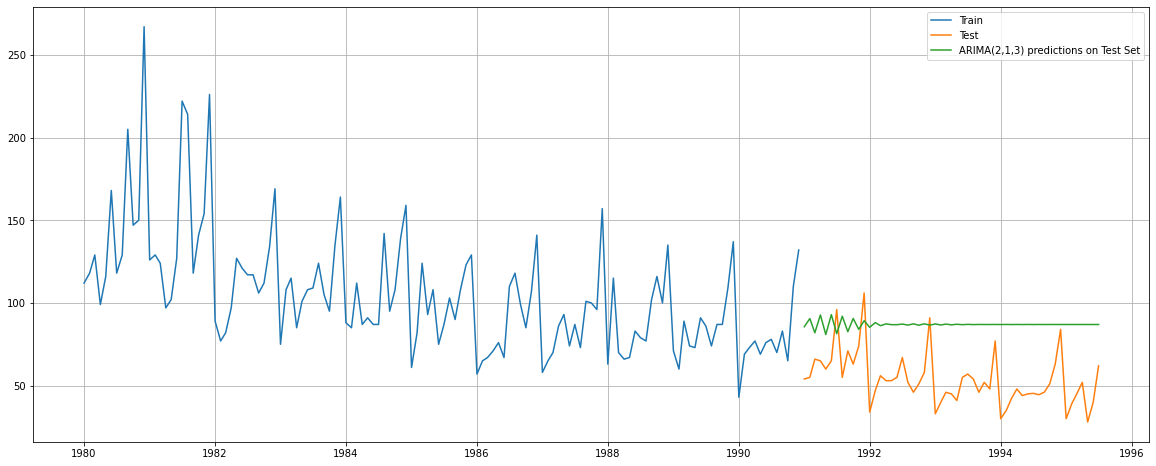

In [464]:
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_auto_ARIMA, label='ARIMA(2,1,3) predictions on Test Set')


plt.legend(loc='best')
plt.grid();

### SARIMA Model - with 6 months seasonality

In [465]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [466]:
SARIMA_AIC_6 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_6

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [467]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC_6 = SARIMA_AIC_6.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113859
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827492
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1081.2713830625262
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087983
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149034
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266721953
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1058.9861743124366
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515097
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.022442632412
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1058.8048206424671
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1072.546583469527
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1061.3687765140075
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1058.0425053208362
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1058.891708800859
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029557
SARIMA(0, 1, 1)x(0, 0, 2, 6) - 

SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1068.4781627388459
SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1051.6734607528306
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:965.1764048847533
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:974.1258778649587
SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:975.8068385700585
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:967.6521336371324
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:967.1740894300113
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:1253.9102116146705
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1185.7691921531987
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1082.5581033340538
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1005.489464308464
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:1200.4217492510918
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1150.728323067526
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1063.1103218716592
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:996.8723979575298
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1073.6961457873563
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1070.0771798924668
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1045.2203768452962
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:9

In [468]:
SARIMA_AIC_6.sort_values(by=['AIC']).head()

param      seasonal         AIC
187  (2, 1, 3)  (2, 0, 3, 6)  951.744298
59   (0, 1, 3)  (2, 0, 3, 6)  952.073632
251  (3, 1, 3)  (2, 0, 3, 6)  952.582102
191  (2, 1, 3)  (3, 0, 3, 6)  953.205612
123  (1, 1, 3)  (2, 0, 3, 6)  953.684951

In [469]:
import statsmodels.api as sm
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -464.872
Date:                           Sun, 06 Feb 2022   AIC                            951.744
Time:                                   00:12:39   BIC                            981.349
Sample:                               01-01-1980   HQIC                           963.750
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5027      0.083     -6.080      0.000      -0.665      -0.341
ar.L2         -0.6628      0.084     -7.917

In [470]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  66.899478  16.350574      34.852941      98.946014
1991-02-01  65.991513  16.481859      33.687662      98.295364
1991-03-01  74.438322  16.587740      41.926949     106.949695
1991-04-01  76.039992  16.710303      43.288400     108.791585
1991-05-01  78.413575  16.710917      45.660780     111.166371

In [471]:
SARIMA_rmse_6 = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print("For SARIMA on the Test Data for 6 months seasonality,  RMSE is %3.3f " %(SARIMA_rmse_6))

For SARIMA on the Test Data for 6 months seasonality,  RMSE is 27.153 


In [472]:
resultsDf_SARIMA_6 = pd.DataFrame({'Test RMSE': [SARIMA_rmse_6]}
                           ,index=['SARIMA(2,1,3)(2,0,3,6)'])

resultsDf = pd.concat([resultsDf, resultsDf_SARIMA_6])
resultsDf.round(0)

Test RMSE
RegressionOnTime                                         15.0
NaiveModel                                               80.0
SimpleAverageModel                                       53.0
2pointTrailingMovingAverage                              12.0
4pointTrailingMovingAverage                              14.0
6pointTrailingMovingAverage                              15.0
9pointTrailingMovingAverage                              15.0
Alpha=0.0987,SimpleExponentialSmoothing                  37.0
Alpha=0,Beta=0,DoubleExponentialSmoothing                15.0
Alpha=0.071,Beta=0.045,Gamma=.000084,TripleExpo...       20.0
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...       10.0
ARIMA(2,1,3)                                             37.0
SARIMA(2,1,3)(2,0,3,6)                                   27.0

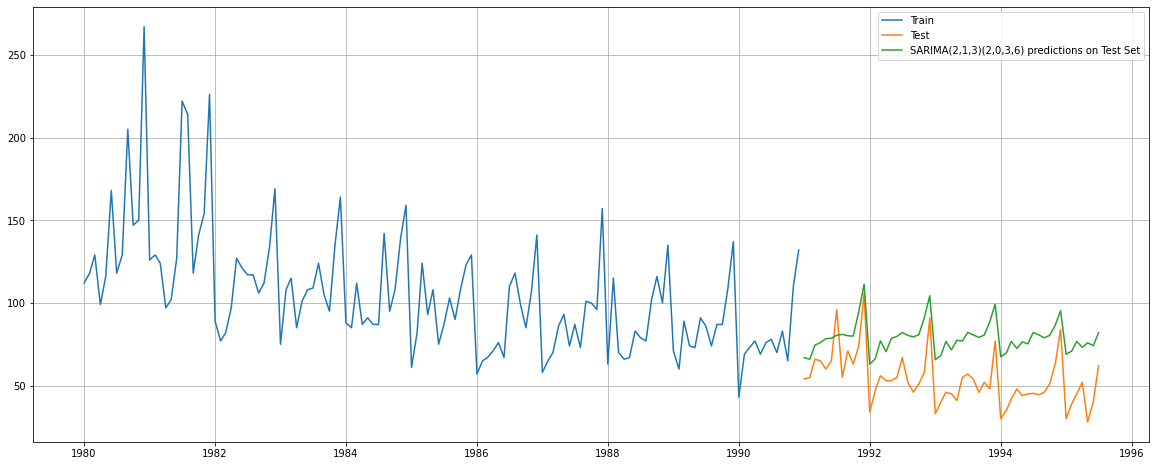

In [473]:
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(predicted_auto_SARIMA_6.predicted_mean, label='SARIMA(2,1,3)(2,0,3,6) predictions on Test Set')
plt.legend(loc='best')
plt.grid();

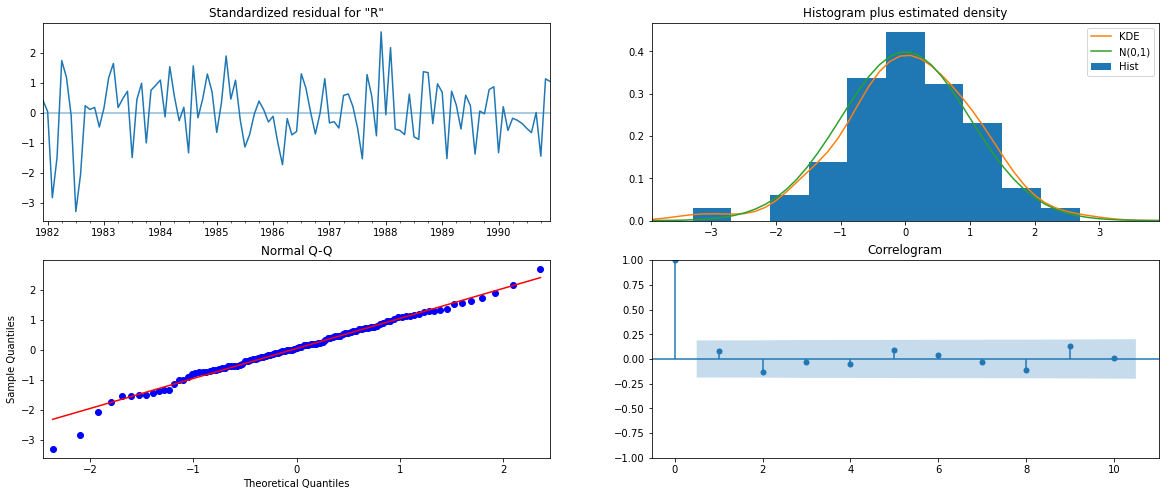

In [474]:
results_auto_SARIMA_6.plot_diagnostics();

### SARIMA Model - with 12 months seasonality

In [475]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [476]:
SARIMA_AIC_12 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_12

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [477]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC_12 = SARIMA_AIC_12.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720736
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380896
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869384913
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635754179
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697556
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945536
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383756
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918096
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094632
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483305353
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536011
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461671
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.198826402149
SARIMA(0, 1, 2)x(0, 0, 0

In [478]:
SARIMA_AIC_12.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
53  (1, 1, 2)  (2, 0, 2, 12)  896.686896
78  (2, 1, 2)  (2, 0, 0, 12)  897.346444

In [479]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 06 Feb 2022   AIC                            887.938
Time:                                    00:16:10   BIC                            906.448
Sample:                                01-01-1980   HQIC                           895.437
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.757     -0.004      0.996    -372.760     371.074
ma.L2         -0.1573     29.812   

In [480]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  62.867263  15.928501      31.647976      94.086550
1991-02-01  70.541190  16.147658      38.892361     102.190019
1991-03-01  77.356410  16.147656      45.707586     109.005235
1991-04-01  76.208814  16.147656      44.559989     107.857638
1991-05-01  72.747398  16.147656      41.098573     104.396222

In [481]:
SARIMA_rmse_12 = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print("For SARIMA on the Test Data for 12 months seasonality,  RMSE is %3.3f " %(SARIMA_rmse_12))

For SARIMA on the Test Data for 12 months seasonality,  RMSE is 26.951 


In [482]:
resultsDf_SARIMA_12 = pd.DataFrame({'Test RMSE': [SARIMA_rmse_12]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_SARIMA_12])
resultsDf.round(0)

Test RMSE
RegressionOnTime                                         15.0
NaiveModel                                               80.0
SimpleAverageModel                                       53.0
2pointTrailingMovingAverage                              12.0
4pointTrailingMovingAverage                              14.0
6pointTrailingMovingAverage                              15.0
9pointTrailingMovingAverage                              15.0
Alpha=0.0987,SimpleExponentialSmoothing                  37.0
Alpha=0,Beta=0,DoubleExponentialSmoothing                15.0
Alpha=0.071,Beta=0.045,Gamma=.000084,TripleExpo...       20.0
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...       10.0
ARIMA(2,1,3)                                             37.0
SARIMA(2,1,3)(2,0,3,6)                                   27.0
SARIMA(0,1,2)(2,0,2,12)                                  27.0

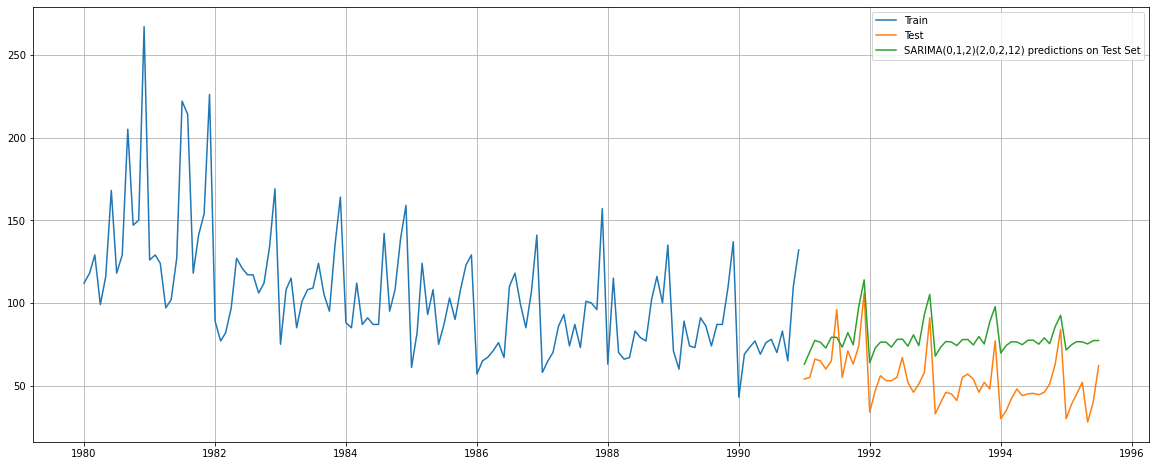

In [483]:
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(predicted_auto_SARIMA_12.predicted_mean, label='SARIMA(0,1,2)(2,0,2,12) predictions on Test Set')
plt.legend(loc='best')
plt.grid();

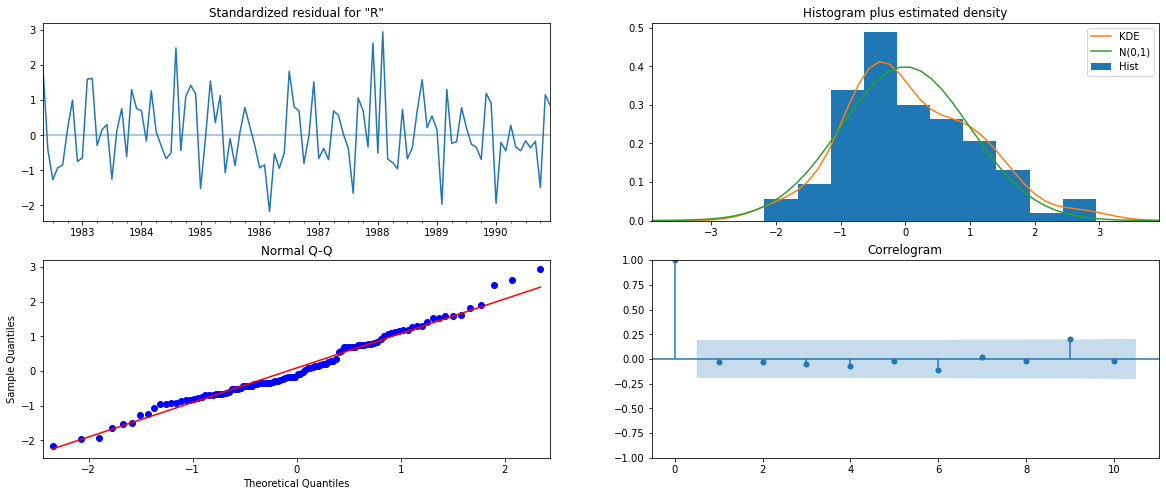

In [484]:
results_auto_SARIMA_12.plot_diagnostics();

# 7- Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### ARIMA

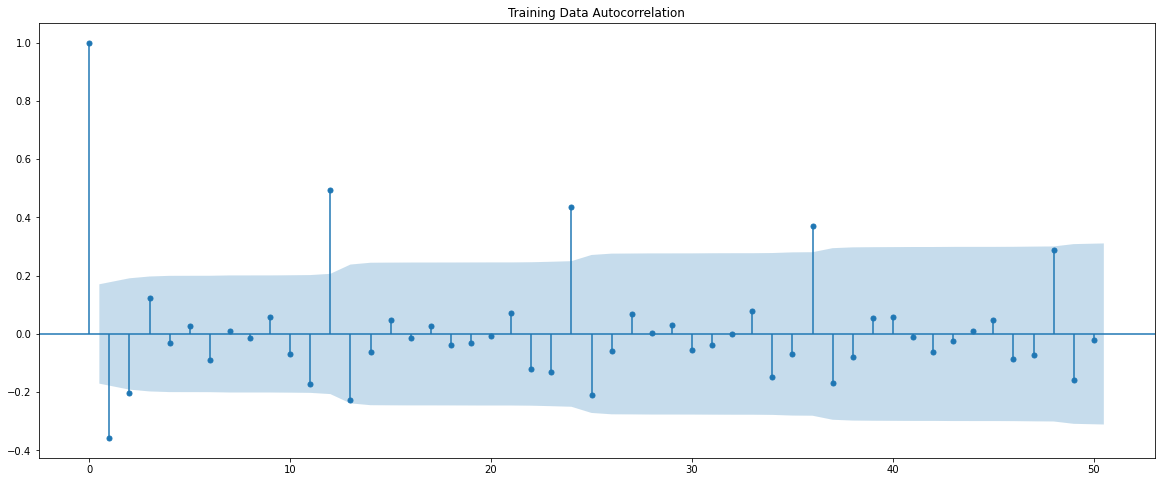

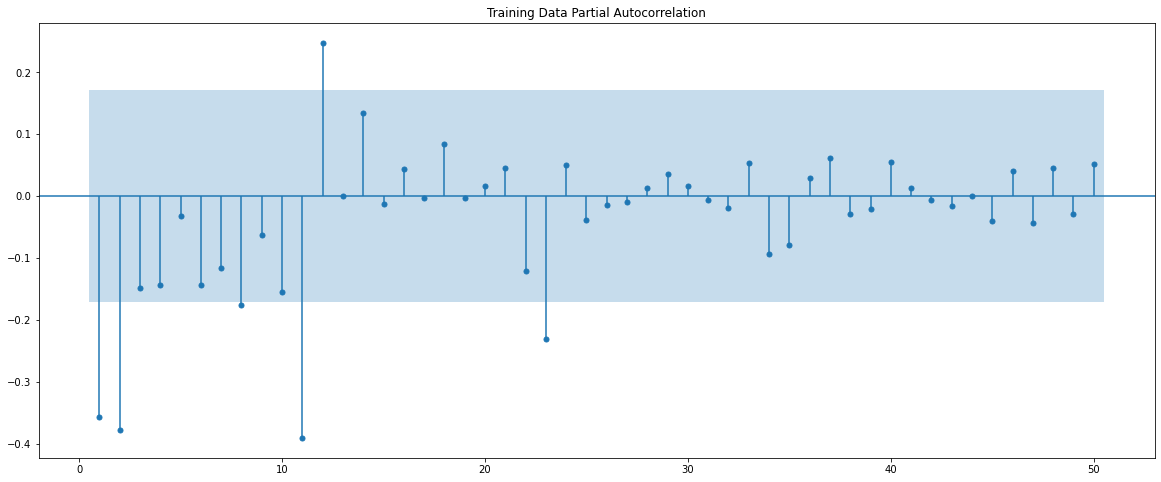

In [485]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop',lags=50)
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle',lags=50)
plt.show()

In [486]:
manual_ARIMA = ARIMA(train, order=(2,1,2))
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 06 Feb 2022   AIC                           1281.871
Time:                        00:24:52   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

In [487]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [488]:
manual_ARIMA_rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
print("For manual ARIMA on the Test Data,  RMSE is %3.3f " %(manual_ARIMA_rmse))

For manual ARIMA on the Test Data,  RMSE is 36.895 


In [489]:
resultsDf_manual_ARIMA = pd.DataFrame({'Test RMSE': [ARIMA_rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_manual_ARIMA])
resultsDf.round(0)

Test RMSE
RegressionOnTime                                         15.0
NaiveModel                                               80.0
SimpleAverageModel                                       53.0
2pointTrailingMovingAverage                              12.0
4pointTrailingMovingAverage                              14.0
6pointTrailingMovingAverage                              15.0
9pointTrailingMovingAverage                              15.0
Alpha=0.0987,SimpleExponentialSmoothing                  37.0
Alpha=0,Beta=0,DoubleExponentialSmoothing                15.0
Alpha=0.071,Beta=0.045,Gamma=.000084,TripleExpo...       20.0
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...       10.0
ARIMA(2,1,3)                                             37.0
SARIMA(2,1,3)(2,0,3,6)                                   27.0
SARIMA(0,1,2)(2,0,2,12)                                  27.0
ARIMA(2,1,2)                                             37.0

### SARIMA

In [500]:
from  statsmodels.tsa.statespace.sarimax import SARIMAX
manual_SARIMA =SARIMAX(train['Rose'],
                                order=(2, 1, 2),
                                seasonal_order=(1, 0, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

In [501]:
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)

In [502]:
print(results_manual_SARIMA.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                       Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(1, 0, [1, 2, 3], 12)   Log Likelihood               -1848.644
Date:                                    Sun, 06 Feb 2022   AIC                           3715.288
Time:                                            00:34:22   BIC                           3737.984
Sample:                                        01-01-1980   HQIC                          3724.449
                                             - 12-01-1990                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6129         -0        inf      0

In [503]:
predicted_manual_SARIMA = results_manual_SARIMA.forecast(steps=len(test))

In [504]:
manual_SARIMA_rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA,squared=False)
print("For manual SARIMA on the Test Data,  RMSE is %3.3f " %(manual_SARIMA_rmse))

For manual SARIMA on the Test Data,  RMSE is 13617.594 


In [505]:
resultsDf_manual_ARIMA = pd.DataFrame({'Test RMSE': [manual_SARIMA_rmse]}
                           ,index=['SARIMA(2,1,2)(1,0,3,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_manual_ARIMA])
resultsDf.round(0)

Test RMSE
RegressionOnTime                                         15.0
NaiveModel                                               80.0
SimpleAverageModel                                       53.0
2pointTrailingMovingAverage                              12.0
4pointTrailingMovingAverage                              14.0
6pointTrailingMovingAverage                              15.0
9pointTrailingMovingAverage                              15.0
Alpha=0.0987,SimpleExponentialSmoothing                  37.0
Alpha=0,Beta=0,DoubleExponentialSmoothing                15.0
Alpha=0.071,Beta=0.045,Gamma=.000084,TripleExpo...       20.0
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...       10.0
ARIMA(2,1,3)                                             37.0
SARIMA(2,1,3)(2,0,3,6)                                   27.0
SARIMA(0,1,2)(2,0,2,12)                                  27.0
ARIMA(2,1,2)                                             37.0
SARIMA(2,1,2)(1,0,3,12)                               13618.0

# 8- Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [506]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...     10.157722
2pointTrailingMovingAverage                            11.529811
4pointTrailingMovingAverage                            14.457115
6pointTrailingMovingAverage                            14.571789
9pointTrailingMovingAverage                            14.731914
Alpha=0,Beta=0,DoubleExponentialSmoothing              15.257793
RegressionOnTime                                       15.276693
Alpha=0.071,Beta=0.045,Gamma=.000084,TripleExpo...     20.269280
SARIMA(0,1,2)(2,0,2,12)                                26.951360
SARIMA(2,1,3)(2,0,3,6)                                 27.152612
Alpha=0.0987,SimpleExponentialSmoothing                36.725007
ARIMA(2,1,3)                                           36.835051
ARIMA(2,1,2)                                           36.835051
SimpleAverageModel                                     53.483727
NaiveModel                                             79.741326
SARIMA(2,1,2)(1,0,3,12)                             13617.594408

# 9- Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

Based on the RMSE values, the triple exponential smoothing with Alpha=0.3,Beta=0.3,Gamma=0.4 is our optimum model. We will use the this model and these parameters to train the model on full dataset

In [508]:
fullmodel1 = ExponentialSmoothing(dfr,trend='additive',seasonal='multiplicative')
fullmodel1= fullmodel1.fit(smoothing_level=0.3, smoothing_trend=0.3, smoothing_seasonal=0.4)

In [509]:
RMSE_fullmodel1 = mean_squared_error(dfr['Rose'],fullmodel1.fittedvalues,squared=False)

RMSE_fullmodel1

21.012723301353063

In [510]:
# Getting the predictions for the 12 months
prediction_1 = fullmodel1.forecast(steps=12)

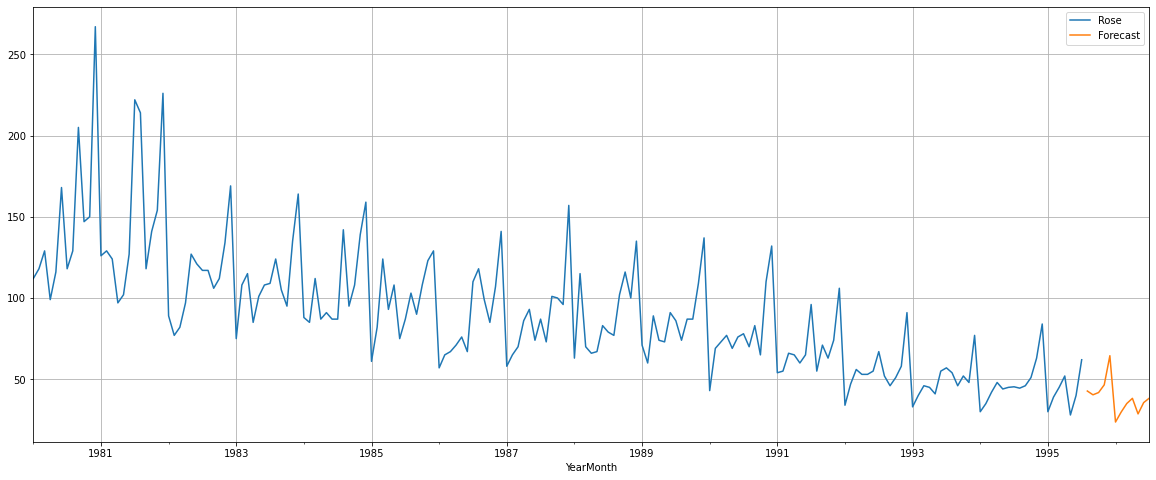

In [511]:
dfr.plot(legend  = True, label = 'Actual')
prediction_1.plot(legend = True, label = 'Forecast');
plt.grid()

### Prediction Confidence Intervals : Margin of Error
One assumption that we will make over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [512]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level.Here we are taking the multiplier to be 1.96 since in a normal distribution( as the residual should be if you have done the modelling properly,), 95% of values lie within +/- 1.96 sigma of the mean

pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*fullmodel1.resid.std(),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*fullmodel1.resid.std()}).round(0)
pred_1_df.head()

lower_CI  prediction  upper_ci
1995-08-01       1.0        43.0      84.0
1995-09-01      -1.0        40.0      82.0
1995-10-01       1.0        42.0      83.0
1995-11-01       5.0        47.0      88.0
1995-12-01      23.0        64.0     106.0

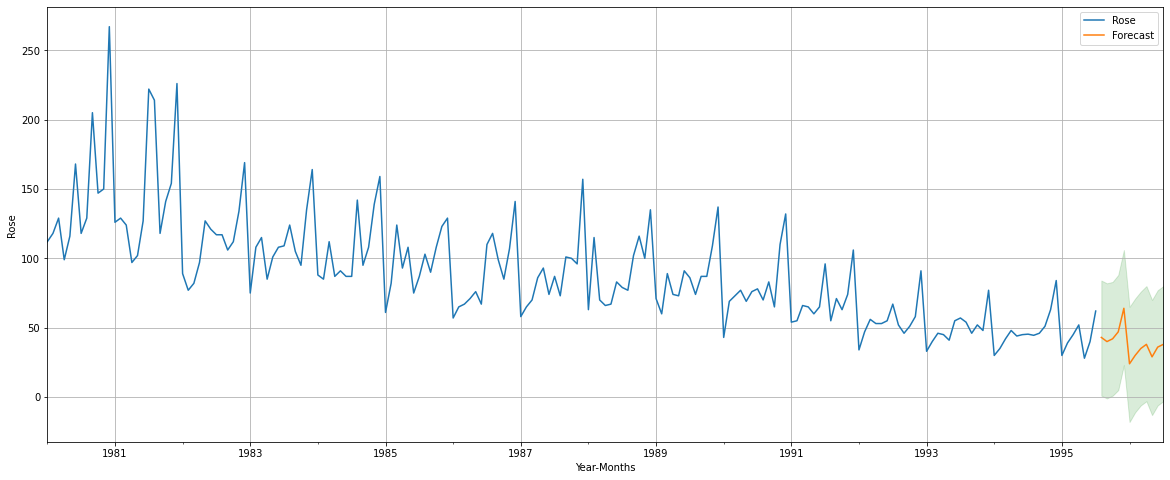

In [513]:
# plot the forecast along with the confidence band

axis = dfr.plot(label='Actual') # saving the plot axis to refer to it later for superimposing other plots or add layers to it

pred_1_df['prediction'].plot(ax=axis, 
                             label='Forecast', 
                             alpha=1) # alpha here is for transparency of the prediction line

# fill_between function shades a specified region in the plot. The region's bounds are specified as the x axis values and y axis values

axis.fill_between(pred_1_df.index, 
                  pred_1_df['lower_CI'], 
                  pred_1_df['upper_ci'], 
                  color='green', 
                  alpha=.15) # alpha here denotes the transparency of the shaded region

axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid();